# Heart Disease Prediction from Clinical Data

This project addresses a **classic binary classification problem in the medical field**: predicting whether a patient has heart disease or not, based on a set of clinical variables obtained during routine check-ups.

We will work with a **dataset consisting of 918 observations**, where each row represents a different patient and the columns contain medical information such as:

- **Age**
- **Resting Blood Pressure (RestingBP)**
- **Serum Cholesterol (Cholesterol)**
- **Resting Electrocardiogram Results (RestingECG)**
- **Exercise-related indicators** such as Maximum Heart Rate (MaxHR), ST segment depression (Oldpeak), and Exercise-Induced Angina (ExerciseAngina)
- **Categorical features** such as Chest Pain Type (ChestPainType)
- **Target variable:** `HeartDisease`, which indicates whether the patient has (1) or does not have (0) heart disease.

---

## 🎯 Project Objective

The main goal is to **build a predictive model** capable of detecting the presence of heart disease with a balanced performance between **precision** and **recall**.

Beyond the model itself, the educational objective is to **explain step by step** the typical workflow in a *Machine Learning project applied to healthcare*, so that anyone can:
- Understand the process,
- Reproduce the results,
- And apply the methodology to other clinical datasets.

---

## 🧾 Variable Dictionary

| Variable | Type | Description |
|:----------|:------|:-------------|
| **Age** | Numeric | Patient’s age (in years). |
| **Sex** | Categorical | Patient’s sex: `M` (male), `F` (female). |
| **ChestPainType** | Categorical | Type of chest pain:<br> - `TA`: Typical angina<br> - `ATA`: Atypical angina<br> - `NAP`: Non-anginal pain<br> - `ASY`: Asymptomatic. |
| **RestingBP** | Numeric | Resting blood pressure (mm Hg). |
| **Cholesterol** | Numeric | Serum cholesterol (mg/dl). |
| **FastingBS** | Binary | Fasting blood sugar > 120 mg/dl:<br> - `1`: Yes<br> - `0`: No. |
| **RestingECG** | Categorical | Resting electrocardiogram results:<br> - `Normal`<br> - `ST`: ST-T wave abnormality<br> - `LVH`: Left ventricular hypertrophy. |
| **MaxHR** | Numeric | Maximum heart rate achieved. |
| **ExerciseAngina** | Binary | Exercise-induced angina:<br> - `Y`: Yes<br> - `N`: No. |
| **Oldpeak** | Numeric | ST depression induced by exercise relative to rest. |
| **ST_Slope** | Categorical | Slope of the ST segment during exercise:<br> - `Up`: Upsloping<br> - `Flat`: Flat<br> - `Down`: Downsloping. |
| **HeartDisease** | Binary | Target variable:<br> - `1`: Presence of heart disease<br> - `0`: Absence of heart disease. |

---

## 🧾 Index

This notebook follows a structured workflow with the goal of illustrating **all the phases of a Machine Learning project**, from data exploration to final model evaluation.  
The complete process is divided into the following stages:

- **Phase 0:** Environment Setup  
- **Phase 1:** Dataset Loading and Initial Review  
- **Phase 2:** Exploratory Data Analysis (EDA)  
- **Phase 3:** Feature Engineering and Encoding  
- **Phase 4:** Model Training and Comparison  
- **Phase 5:** Hyperparameter Tuning and Optimal Model Selection  
- **Phase 6:** Conclusions and Results Analysis

---

## 🔧 Phase 0: Environment Setup

Before starting any analysis, it is essential to **prepare the working environment**.  
This includes:

- Importing the necessary libraries  
- Setting up visualization options  
- Documenting from the very first code block  

🎯 **Objective of this phase:**  
Get the environment ready for analysis, making it explicit which tools will be used and why.

In [1]:
# Data analysis and manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics and hypothesis testing
from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu

# Preprocessing, modeling, and evaluation (Machine Learning)
import joblib  # Saving and loading trained models

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import (
    RandomizedSearchCV,
    StratifiedKFold,
    cross_validate,
    train_test_split,
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import (
    RocCurveDisplay,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

# Model explainability
import shap

# General environment configuration
import warnings
warnings.filterwarnings("ignore")  # Suppress non-critical warnings

# Display plots inside the notebook
%matplotlib inline
sns.set_theme(style="whitegrid")  # Define consistent visual style

/home/mpelaez/workspace/heart_disease/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 📥 Phase 1: Dataset Loading and Initial Review

In this phase, we begin data analysis by importing the dataset that will serve as the foundation for our predictive model.  
The main goal is to **understand the overall structure of the dataset** before applying any transformations.

🎯 Objective of this phase

- Load the data from the corresponding source (CSV, database, etc.).  
- Explore the **dataset dimensions** (rows and columns).  
- Identify the **type of each variable** (numerical, categorical, or binary).  
- Detect **null or missing values**.  
- Observe possible inconsistencies or initial data errors.

This step is essential to obtain a **broad overview of the dataset** and plan the subsequent data cleaning and preprocessing stages.

In [2]:
# Load the dataset
df = pd.read_csv("heart.csv")  # Make sure the file is in the same directory

# Display dataset dimensions (rows, columns)
print(f"Dataset dimensions: {df.shape[0]} rows and {df.shape[1]} columns\n")

# Preview the first few records
display(df.head())

Dataset dimensions: 918 rows and 12 columns



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# General dataset information: data types, non-null counts, and memory usage
df.info()

# Count of null values per column (to detect missing data)
print("\nNull values per column:\n")
print(df.isnull().sum())

# Count of unique values per column (useful to distinguish categorical and numerical variables)
print("\nUnique values per column:\n")
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Null values per column:

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina  

## 🔍 Phase 2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is one of the most important stages in any Machine Learning project.  
Its main goal is to **thoroughly understand the nature of the data** before applying transformations or building predictive models.

Unlike modeling, here we are not trying to predict anything — we aim to **understand, detect patterns, inconsistencies, and relationships** among variables.

🎯 General Objective of this Phase

- Analyze the shape, behavior, and relationships among variables.  
- Identify outliers, skewed distributions, and strong correlations.  
- Determine which variables should be cleaned, transformed, or removed.  

In summary: this is the stage where **key decisions are made** that will determine the quality of the subsequent modeling.

---

🧭 EDA Subphases

🔹 **EDA 1 — Univariate Analysis (variable by variable)**  
Variables are analyzed individually to understand their distribution and basic characteristics:

- Are they symmetric or skewed?  
- Do they contain outliers?  
- Are they discrete or continuous?  


🔹 **EDA 2 — Bivariate Analysis with the Target Variable (`HeartDisease`)**  
Here we explore how the predictor variables relate to the target variable, looking for patterns that help generate hypotheses:

- Are there variables that clearly differentiate between classes?  
- What kind of relationship do they have with the *target*?  


🔹 **EDA 3 — Target Variable Analysis: `HeartDisease`**  
Here we analyze the target variable by itself.

- Is it balanced?  
- Do we need to apply resampling techniques?  
- What metrics should we use to evaluate the model?


---
### 🔍 EDA 1: Univariate Analysis

#### 📘 EDA 1.1: Univariate Analysis of Numerical Variables

We start with the **numerical variables** to examine:

- Their distributions (symmetry, skewness, long tails).  
- Presence of outliers.  
- Possible need for scaling or transformation.

In this first stage, we will visualize each numerical variable using **histograms** (to observe the shape of the distribution) and **boxplots** (to detect possible outliers)

These visualizations allow us to identify patterns, skews, and anomalies that may influence the preprocessing and modeling stages


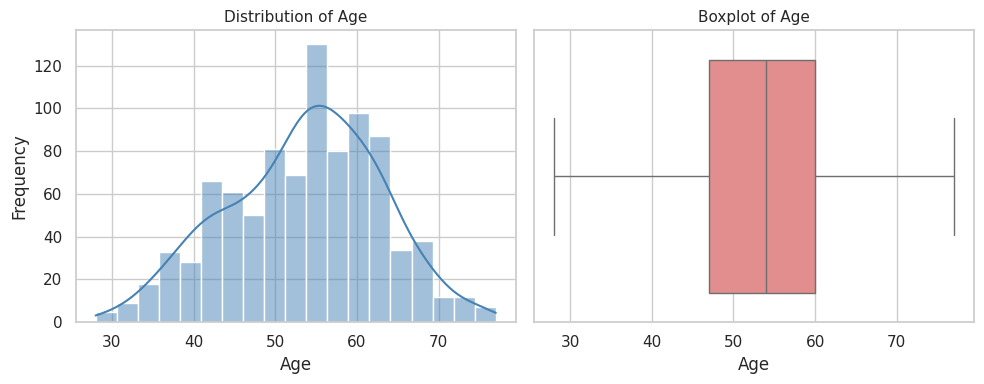

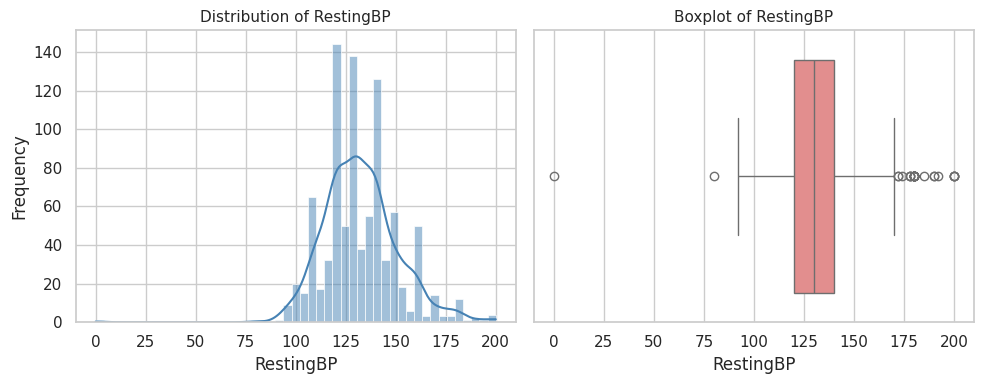

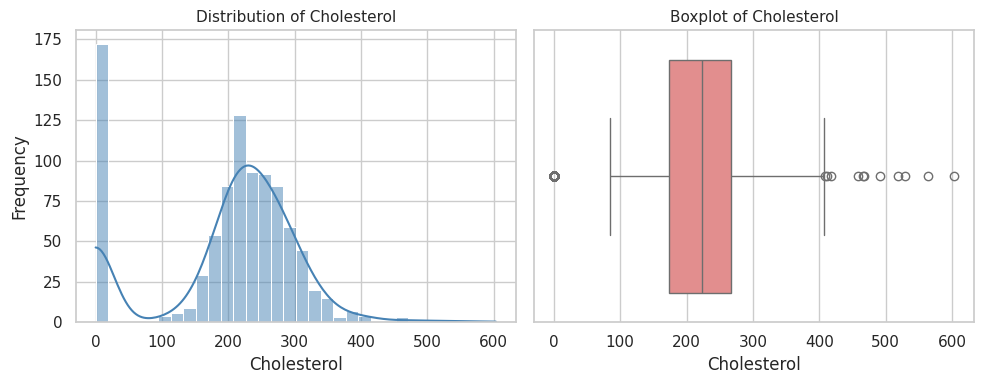

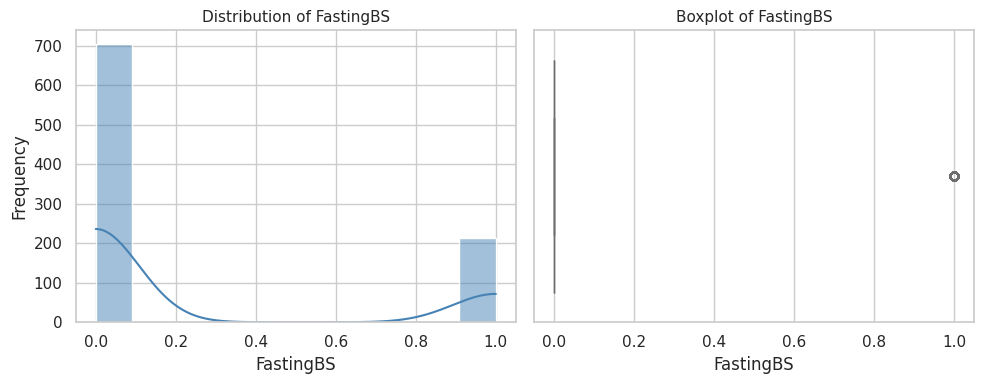

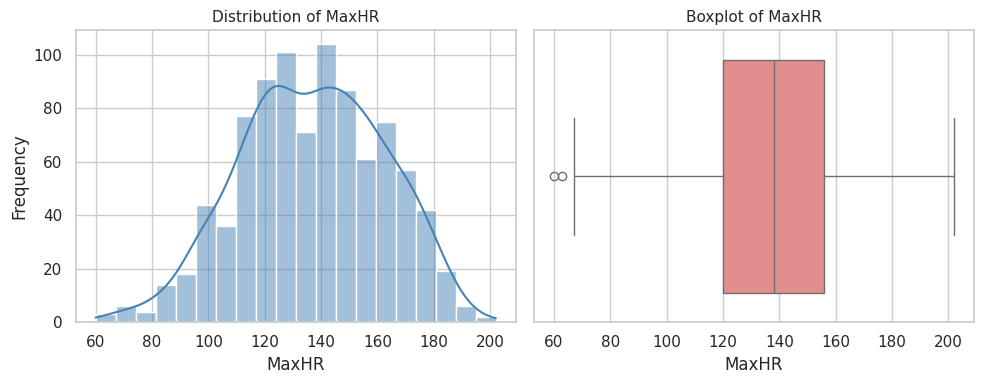

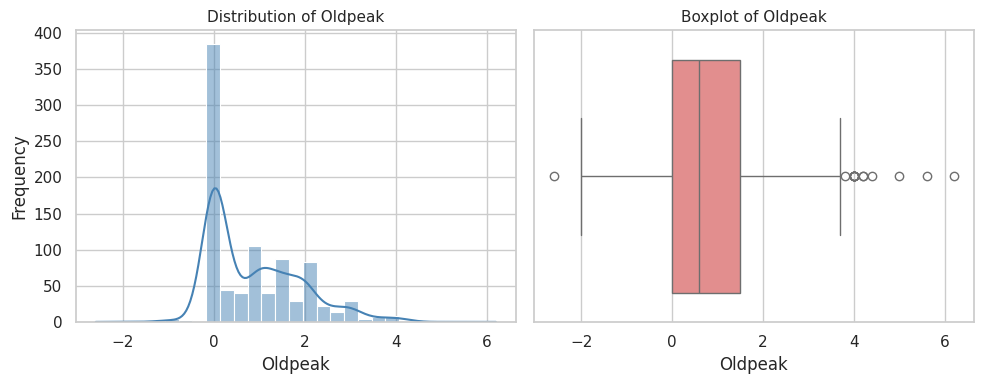

In [4]:
# Select numerical variables, excluding the target variable (HeartDisease)
numerical_variables = df.select_dtypes(include=["int64", "float64"]).drop(columns=["HeartDisease"])

# Loop through each numerical variable to analyze its distribution and possible outliers
for col in numerical_variables.columns:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    
    # Histogram with density curve
    sns.histplot(data=df, x=col, kde=True, color="steelblue", ax=axs[0])
    axs[0].set_title(f"Distribution of {col}", fontsize=11)
    axs[0].set_xlabel(col)
    axs[0].set_ylabel("Frequency")
    
    # Boxplot for visual detection of outliers
    sns.boxplot(data=df, x=col, color="lightcoral", ax=axs[1])
    axs[1].set_title(f"Boxplot of {col}", fontsize=11)
    axs[1].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()

**Results Analysis**

After visualizing the numerical variables, we analyzed their individual behavior, distribution, and clinical plausibility.  
The goal is to decide which transformations or actions should be taken before modeling.

---

🔹 1. Age  
- **Distribution:** Approximately normal, with slight negative skewness.  
- **Boxplot:** No outliers observed.  
- **Range:** Minimum ~28 years, maximum ~77 years → clinically plausible values.  
- **Action:** Keep unchanged. May be normalized if using models sensitive to scale (SVM, KNN, MLP).

🔹 2. RestingBP (Resting Blood Pressure)  
- **Distribution:** Positively skewed. Higher concentration between 110–150 mmHg, peak around 120.  
- **Boxplot:** Outliers on both ends.  
- **Range:** Minimum = 0 → physiologically impossible.  
- **Suggested action:**  
  - Review and remove/impute zero values.  
  - Consider logarithmic transformation or robust trimming if using linear or scale-sensitive models.

🔹 3. Cholesterol  
- **Distribution:** Strongly positively skewed. Abnormal peak at 0.  
- **Boxplot:** Outliers between 400–600 mg/dL.  
- **Range:** Minimum = 0 → medically implausible.  
- **Suggested action:**  
  - Treat zeros as missing or erroneous values.  
  - Consider logarithmic transformation to correct skewness.  
  - Handle outliers if using sensitive models (e.g., logistic regression).

🔹 4. FastingBS (Fasting Blood Sugar >120 mg/dL)  
- **Distribution:** Binary variable (0 or 1).  
- **Boxplot:** Not applicable for binary variables.  
- **Approximate count:** 700 values = 0, 218 values = 1 → slight imbalance.  
- **Suggested action:**  
  - Treat as categorical/bool variable.  
  - No transformation required.  
  - Can remain as integer if supported by the models.

🔹 5. MaxHR (Maximum Heart Rate Achieved)  
- **Distribution:** Nearly symmetric, with slight negative skewness.  
- **Boxplot:** Few outliers.  
- **Range:** 60–200 bpm → clinically plausible.  
- **Suggested action:**  
  - Ready for modeling.  
  - Scale if using algorithms sensitive to magnitude.

🔹 6. Oldpeak (ST Segment Depression)  
- **Distribution:** Strongly positively skewed, with high concentration at 0 and long right tail.  
- **Boxplot:** Visible outliers; presence of negative values that may be errors.  
- **Suggested action:**  
  - Verify negative values — may be incorrect.  
  - Apply logarithmic or square root transformation to reduce skewness.  
  - Can remain untransformed for tree-based models.

Overall, this analysis helps **define the cleaning and preprocessing strategies** for numerical variables before modeling:  
- Correction of impossible values (RestingBP and Cholesterol).  
- Optional transformation for skewed variables (Oldpeak, Cholesterol).  
- Possible normalization or scaling if using magnitude-sensitive models.

---
#### 🧩 EDA 1.2: Univariate Analysis of Categorical Variables

After analyzing the numerical variables, we move on to the study of **categorical variables**.  
This part is essential to understand **how categories are distributed**, whether there are **imbalanced classes** or **inconsistent encodings**, and how to **prepare them for modeling**.

🎯 Objective

In this subphase, the goal is to:

- Analyze the **frequency of each category** in qualitative variables (`Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, `ST_Slope`, etc.).  
- Detect **encoding errors** or atypical categories.  
- Evaluate whether there are **highly imbalanced classes** that could affect model learning.  
- Decide the most suitable **encoding strategy**:
  - *One-Hot Encoding* for variables without inherent order.
  - *Label Encoding* for those with a natural or ordinal hierarchy.
- Identify **rare or dominant categories** that could distort the model representation.

Properly analyzing categorical variables allows for the definition of a **robust encoding strategy** and helps prevent bias or information loss in later preprocessing stages.

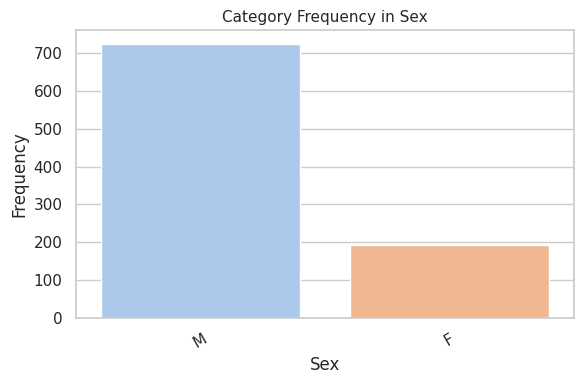

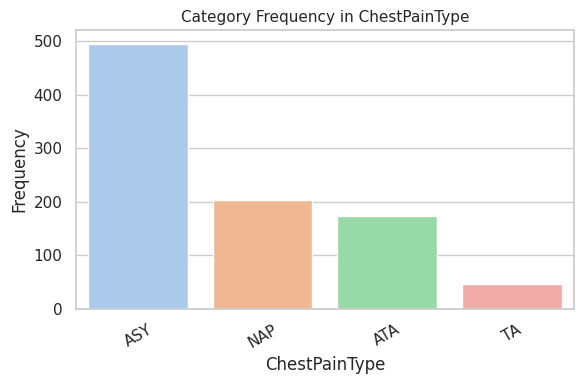

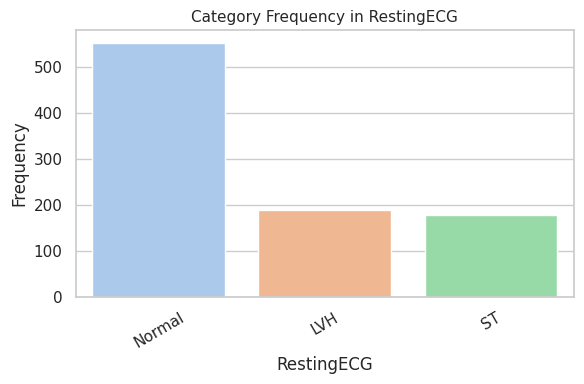

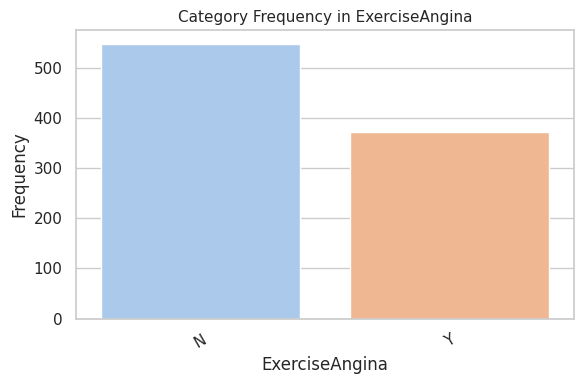

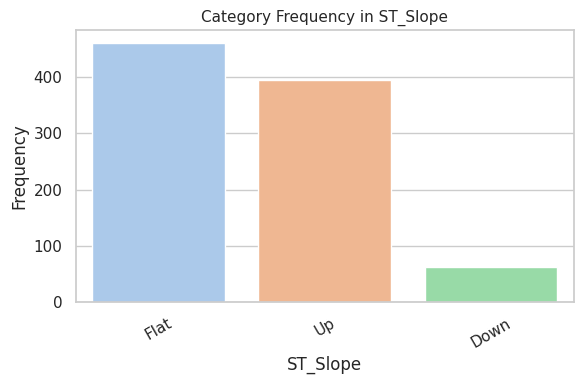

In [5]:
# Select categorical variables from the dataset
categorical = df.select_dtypes(include="object")

# Loop through each categorical variable to visualize its frequency distribution
for col in categorical.columns:
    plt.figure(figsize=(6, 4))
    
    # Bar plot ordered by frequency
    sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        palette="pastel"
    )
    
    plt.title(f"Category Frequency in {col}", fontsize=11)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

**Results Analysis**

In this stage, we analyzed the categorical variables to understand how their classes are distributed, identify possible encoding issues, and decide on the best representation strategy for modeling.

---

🔹 **Sex**  
- **Classes:** `M` (majority), `F` (minority).  
- **Distribution:** Moderately imbalanced (approx. 75% male, 25% female).  
- **Encoding:** Correct, clear, and standard (`M`, `F`).  
- **Decisions:**  
  - Encode as binary (`M` → 1, `F` → 0).  
  - Alternatively, apply *One-Hot Encoding* (though it will only generate one extra column).  
  - Variable suitable for direct use after encoding.

---

🔹 **ChestPainType**  
- **Classes:**  
  - `ASY` → dominant  
  - `NAP`  
  - `ATA`  
  - `TA`  
- **Distribution:** Slightly imbalanced, but all classes are represented.  
- **Decisions:**  
  - **Nominal** variable (no inherent order).  
  - Apply *One-Hot Encoding* to prevent the model from assuming nonexistent relationships among categories.

---

🔹 **RestingECG** (Resting Electrocardiogram)  
- **Classes:**  
  - `Normal` → dominant (~60%)  
  - `LVH` → left ventricular hypertrophy  
  - `ST` → ST segment abnormality  
- **Distribution:** Slightly imbalanced but all classes have sufficient representation.  
- **Decisions:**  
  - **Nominal** variable (no inherent order).  
  - Apply *One-Hot Encoding* to prevent the model from interpreting nonexistent relationships between categories.

---

🔹 **ExerciseAngina** (Exercise-Induced Angina)  
- **Classes:** `N` (majority), `Y` (minority).  
- **Distribution:** Moderately imbalanced.  
- **Encoding:** Binary text (`Y` / `N`).  
- **Decisions:**  
  - Encode as binary (`Y` → 1, `N` → 0).  
  - Does not require *One-Hot Encoding* or additional transformations.

---

🔹 **ST_Slope** (ST Segment Slope)  
- **Classes:**  
  - `Flat` → most frequent  
  - `Up` → second most frequent  
  - `Down` → least frequent  
- **Distribution:** Moderately imbalanced.  
- **Clinical note:**  
  In cardiology, `Up` is generally associated with a healthy exercise response, while `Flat` and `Down` may indicate higher risk.  
- **Decisions:**  
  - **Ordinal** variable, so a numerical encoding preserving the semantic order can be used:  
    `Down` = 0, `Flat` = 1, `Up` = 2  
  - This representation may help linear models.  
  - If the true order is uncertain, apply *One-Hot Encoding* (especially recommended for tree-based models).

---

Analyzing the categorical variables allows for **a coherent and bias-free encoding plan**, ensuring that qualitative information is interpreted correctly by Machine Learning algorithms.

### 🧩 EDA 2 — Bivariate Analysis with the Target Variable (`HeartDisease`)

In this second part of the exploratory analysis, we examine how the independent variables (both numerical and categorical) relate to the **target variable `HeartDisease`**.  
This step is crucial to identify **predictive patterns** and **significant relationships** that will guide the later modeling stages.

---

🎯 **Objective of this phase**

- Evaluate the relationship between patient characteristics and the presence or absence of heart disease.  
- Detect **variables with discriminative power** with respect to the *target*.  
- Identify **statistically significant relationships** between predictor variables and the target variable.  
- Begin defining which variables should be included, transformed, or discarded before model training.

---

#### 📘 EDA 2.1 — Bivariate Analysis of Numerical Variables

In this section, we analyze how **numerical variables** behave depending on the value of `HeartDisease` (`0` = no disease, `1` = heart disease).

For each variable:

- **Boxplots** will be shown to compare both groups, allowing us to visualize distribution differences.  
- **Non-parametric statistical tests** (such as *Mann–Whitney U*) will be applied to verify whether the observed differences are **statistically significant**.  

This approach combines **visual and analytical analysis**, helping to identify variables that truly differentiate between healthy patients and those with heart disease.

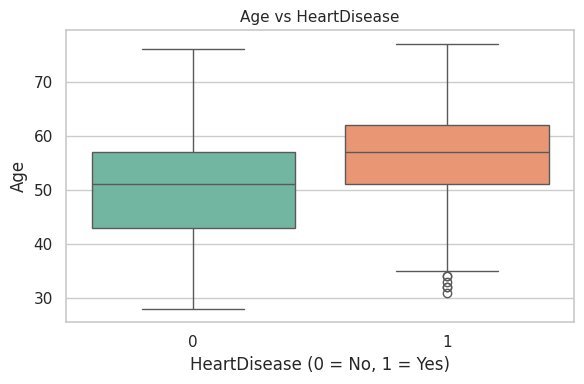

➤ Mann–Whitney Test for Age
   U Statistic = 69137.50
   p-value = 0.0000
   → Significant difference between groups (p < 0.05)
------------------------------------------------------------


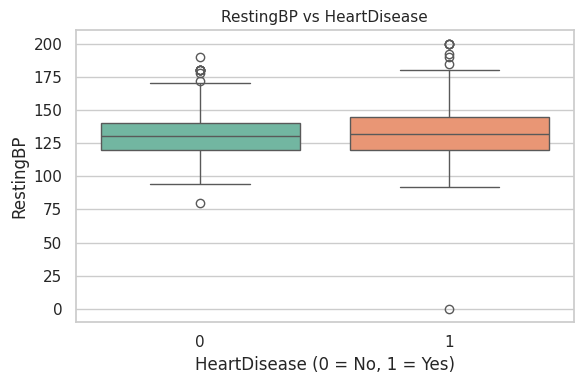

➤ Mann–Whitney Test for RestingBP
   U Statistic = 90420.00
   p-value = 0.0006
   → Significant difference between groups (p < 0.05)
------------------------------------------------------------


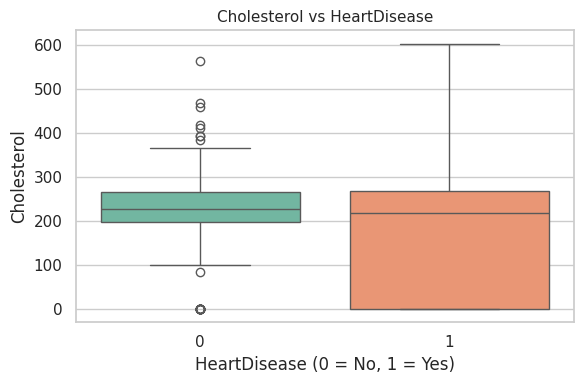

➤ Mann–Whitney Test for Cholesterol
   U Statistic = 121000.50
   p-value = 0.0000
   → Significant difference between groups (p < 0.05)
------------------------------------------------------------


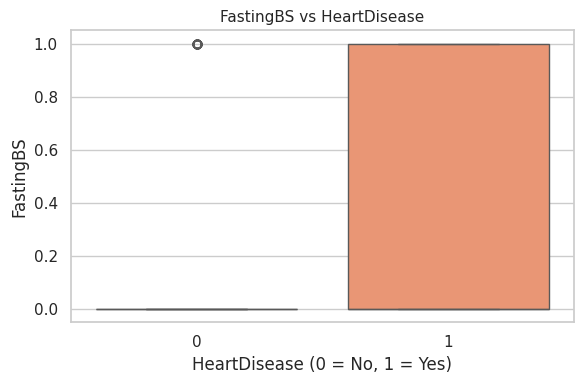

➤ Mann–Whitney Test for FastingBS
   U Statistic = 80466.00
   p-value = 0.0000
   → Significant difference between groups (p < 0.05)
------------------------------------------------------------


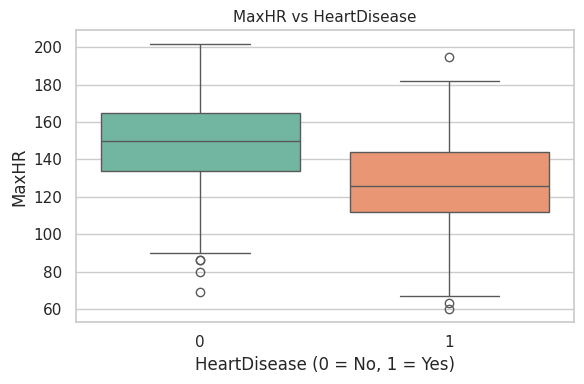

➤ Mann–Whitney Test for MaxHR
   U Statistic = 153089.50
   p-value = 0.0000
   → Significant difference between groups (p < 0.05)
------------------------------------------------------------


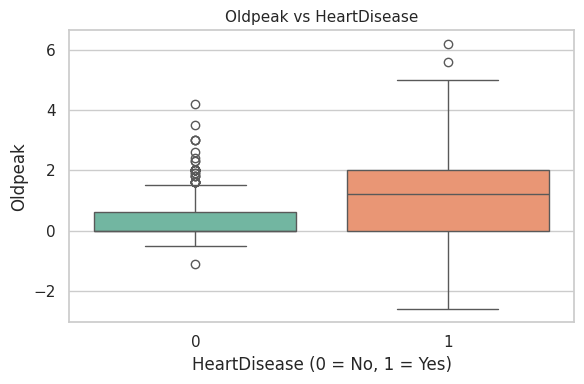

➤ Mann–Whitney Test for Oldpeak
   U Statistic = 55164.00
   p-value = 0.0000
   → Significant difference between groups (p < 0.05)
------------------------------------------------------------


In [6]:
# Select numerical variables excluding the target variable
num_vars = df.select_dtypes(include=["int64", "float64"]).drop(columns=["HeartDisease"]).columns

# Compare each numerical variable against the target variable HeartDisease
for col in num_vars:
    # Comparative visualization using boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        data=df,
        x="HeartDisease",
        y=col,
        palette="Set2"
    )
    plt.title(f"{col} vs HeartDisease", fontsize=11)
    plt.xlabel("HeartDisease (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

    # Separate values according to target class
    group_0 = df[df["HeartDisease"] == 0][col]
    group_1 = df[df["HeartDisease"] == 1][col]

    # Mann–Whitney U test (non-parametric)
    stat, p_value = mannwhitneyu(group_0, group_1, alternative="two-sided")

    # Test results
    print(f"➤ Mann–Whitney Test for {col}")
    print(f"   U Statistic = {stat:.2f}")
    print(f"   p-value = {p_value:.4f}")
    if p_value < 0.05:
        print("   → Significant difference between groups (p < 0.05)")
    else:
        print("   → No significant difference detected (p ≥ 0.05)")
    print("-" * 60)

**Results Analysis**

After comparing the numerical variables against the target variable `HeartDisease`, we analyzed the results in terms of distribution, statistical significance, and clinical implications.

---

🔹 **Age**  
- **Boxplot:** Patients with heart disease tend to be older.  
- **p-value:** 0.0000 → statistically significant difference.  
- **Interpretation:** Age is clearly related to the presence of heart disease, consistent with medical evidence.  
- **Decision:** Include in the model without modification.

---

🔹 **RestingBP** (Resting Blood Pressure)  
- **Boxplot:** Similar groups with a slight visual difference.  
- **p-value:** 0.0006 → significant difference, though subtle.  
- **Interpretation:** May provide some information, but the effect is mild. Also, the zero values must be reviewed.  
- **Decision:** Correct zeros and consider transformation or robust scaling before inclusion.

---

🔹 **Cholesterol**  
- **Boxplot:** High dispersion, especially in patients with disease. Notable presence of outliers.  
- **p-value:** 0.0000 → highly significant.  
- **Interpretation:** Patients with heart disease show more variable and elevated cholesterol levels, although anomalous zeros distort the analysis.  
- **Decision:** Treat zeros as missing values, possibly apply logarithmic transformation. Potentially useful variable after cleaning.

---

🔹 **FastingBS** (Fasting Blood Sugar >120 mg/dL)  
- **Boxplot:** Much more frequent in patients with disease.  
- **p-value:** 0.0000 → very significant.  
- **Interpretation:** Fasting hyperglycemia is a known risk factor for heart disease.  
- **Decision:** Highly informative binary categorical variable. Include directly.

---

🔹 **MaxHR** (Maximum Heart Rate Achieved)  
- **Boxplot:** Patients without heart disease reach higher heart rates.  
- **p-value:** 0.0000 → clear and significant difference.  
- **Interpretation:** The ability to reach higher heart rates indicates better cardiac function.  
- **Decision:** Strong predictive variable. Include in the model.

---

🔹 **Oldpeak** (ST Segment Depression)  
- **Boxplot:** Patients with heart disease show higher and more dispersed values.  
- **p-value:** 0.0000 → very significant.  
- **Interpretation:** Oldpeak measures ST depression during exercise; higher values often indicate worse cardiac condition.  
- **Decision:** Highly informative variable, but requires skewness treatment (log or robust scaling).

---

Overall, all numerical variables show **some degree of significant relationship with `HeartDisease`**, reinforcing their predictive value.

#### 🧩 EDA 2.2 — Bivariate Analysis: Categorical Variables vs. `HeartDisease`

In this subphase, we explore how **categorical variables** relate to the target variable `HeartDisease`.  
The goal is to identify categories that show differential patterns between patients with and without heart disease.

🎯 **Objective**

- Evaluate whether there is a **statistical association** between categorical variables (`Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, `ST_Slope`) and the presence of heart disease.  
- Determine which categorical variables are potentially **predictive**.  
- Support the decision to **retain, transform, or discard** variables before modeling.

---

**Methodology:**
  - Crossed bar charts  
  - Chi-Square (χ²) Test of Independence  

🎯 **Purpose**

The Chi-Square test allows us to verify whether there is a **statistical dependency** between two categorical variables.  
In this case, between a categorical variable (e.g., `ChestPainType`) and `HeartDisease`.

---

**Test Hypotheses**

- **H₀ (Null Hypothesis):** The variables are independent (no relationship).  
- **H₁ (Alternative Hypothesis):** The variables are not independent (there is a relationship).  

---

**Interpretation of p-value**

- **If p < 0.05:** Reject H₀ → There is statistical dependence → The categorical variable is related to `HeartDisease`.  
- **If p ≥ 0.05:** Fail to reject H₀ → No evidence of relationship → The variable may not provide relevant predictive information.

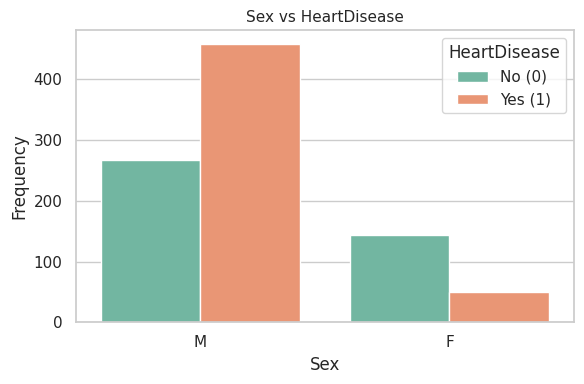

➤ Chi-Square Test for Sex
   χ² = 84.15 | p-value = 0.0000
   → Significant association with HeartDisease (p < 0.05)
------------------------------------------------------------


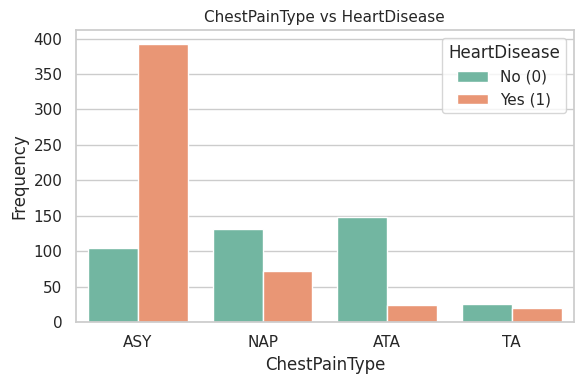

➤ Chi-Square Test for ChestPainType
   χ² = 268.07 | p-value = 0.0000
   → Significant association with HeartDisease (p < 0.05)
------------------------------------------------------------


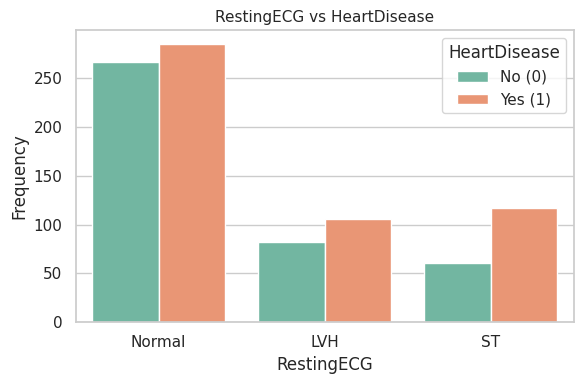

➤ Chi-Square Test for RestingECG
   χ² = 10.93 | p-value = 0.0042
   → Significant association with HeartDisease (p < 0.05)
------------------------------------------------------------


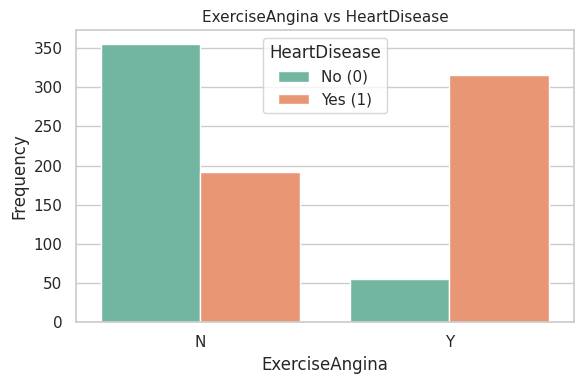

➤ Chi-Square Test for ExerciseAngina
   χ² = 222.26 | p-value = 0.0000
   → Significant association with HeartDisease (p < 0.05)
------------------------------------------------------------


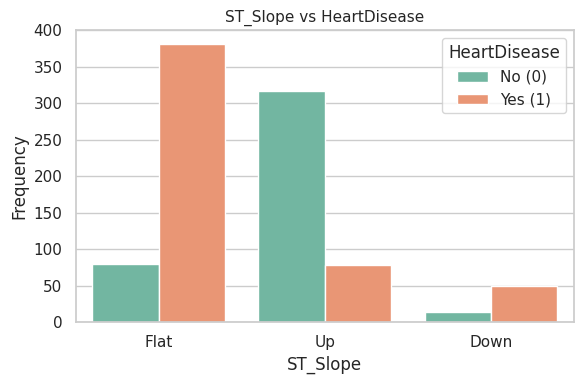

➤ Chi-Square Test for ST_Slope
   χ² = 355.92 | p-value = 0.0000
   → Significant association with HeartDisease (p < 0.05)
------------------------------------------------------------


In [7]:
# Select categorical variables from the dataset
cat_vars = df.select_dtypes(include="object").columns

# Analyze each categorical variable against the target variable HeartDisease
for col in cat_vars:
    # Visualization: grouped bar chart by disease presence
    plt.figure(figsize=(6, 4))
    sns.countplot(
        data=df,
        x=col,
        hue="HeartDisease",
        order=df[col].value_counts().index,
        palette="Set2"
    )
    plt.title(f"{col} vs HeartDisease", fontsize=11)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend(title="HeartDisease", labels=["No (0)", "Yes (1)"])
    plt.tight_layout()
    plt.show()

    # Contingency table (observed frequencies)
    contingency = pd.crosstab(df[col], df["HeartDisease"])

    # Chi-square test of independence
    chi2, p_value, dof, expected = chi2_contingency(contingency)

    # Test results
    print(f"➤ Chi-Square Test for {col}")
    print(f"   χ² = {chi2:.2f} | p-value = {p_value:.4f}")
    if p_value < 0.05:
        print("   → Significant association with HeartDisease (p < 0.05)")
    else:
        print("   → No significant association detected (p ≥ 0.05)")
    print("-" * 60)

**Results Analysis**

After analyzing the categorical variables against the target variable `HeartDisease`, the following summarizes the observations obtained from the bar charts and Chi-Square (χ²) independence tests, along with their clinical interpretation and suggested modeling decisions.

---

🔹 **Sex**  
- **Chart:** Among males (`M`), there are more heart disease cases, while among females (`F`), healthy cases are more prevalent.  
- **p-value:** 0.0000 → highly significant difference.  
- **Interpretation:** Sex is a relevant predictive factor; the risk of heart disease is considerably higher in men, consistent with clinical evidence.  
- **Decision:** Encode as binary (`M` = 1, `F` = 0).

---

🔹 **ChestPainType**  
- **Chart:** The `ASY` chest pain type is strongly associated with heart disease, while `ATA` is more common among healthy patients.  
- **p-value:** 0.0000 → very strong and statistically significant difference.  
- **Interpretation:** One of the strongest clinical predictors. Chest pain types directly reflect the likelihood of heart disease.  
- **Decision:** Encode using *One-Hot Encoding* (a **nominal** variable with no inherent order).

---

🔹 **RestingECG** (Resting Electrocardiogram)  
- **Chart:** The `ST` category shows a higher proportion of patients with heart disease.  
- **p-value:** 0.0042 → significant, though more moderate difference.  
- **Interpretation:** May not be a strong standalone predictor but could complement other physiological variables in multivariate models.  
- **Decision:** Encode using *One-Hot Encoding*. Do not treat as ordinal since there is no clear clinical order among categories (`Normal`, `ST`, `LVH`).

---

🔹 **ExerciseAngina** (Exercise-Induced Angina)  
- **Chart:** Patients with `Y` (yes, angina induced by exercise) show a much higher proportion of heart disease, while those with `N` are mostly healthy.  
- **p-value:** 0.0000 → clear and highly significant difference.  
- **Interpretation:** Exercise-induced angina is a direct clinical indicator of heart disease.  
- **Decision:** Encode as binary (`Y` = 1, `N` = 0). Highly predictive variable.

---

🔹 **ST_Slope** (ST Segment Slope)  
- **Chart:** The `Flat` category dominates among diseased patients, `Up` among healthy ones, and `Down` appears less frequently (indicating higher risk).  
- **p-value:** 0.0000 → highly significant difference.  
- **Interpretation:** Clinically relevant variable. The order `Down < Flat < Up` represents a physiological gradient (from worse to better cardiac response to stress).  
- **Decision:** Encode ordinally (`Down` = 0, `Flat` = 1, `Up` = 2) for linear models, or with *One-Hot Encoding* for tree-based models.

---

Overall, the categorical variables show **statistically significant associations** with `HeartDisease`, confirming their predictive value.  
Particularly strong predictors include **`ChestPainType`**, **`ExerciseAngina`**, and **`ST_Slope`**, both for their statistical significance and clinical relevance.

### ✅ EDA 3 — Target Variable Analysis: `HeartDisease`

Before training any model, it is essential to **analyze the target variable (`HeartDisease`) on its own**, even if we have already used it in the bivariate analysis.  
Understanding its distribution and class balance allows us to design a fairer and more robust modeling process.

---

🎯 **Why analyze `HeartDisease` directly?**

Although `HeartDisease` has already been used to evaluate relationships with other variables, we now examine it independently to answer key questions:

- **Is it balanced?**  
  Is there a similar proportion of patients with (`1`) and without (`0`) heart disease?  
  A significant imbalance may bias the model toward the majority class.

- **What does its distribution imply?**  
  The class ratio influences:
  - The choice of **evaluation metrics** (e.g., *F1-score*, *ROC-AUC*, *Recall*).  
  - The need to **adjust class weights** or apply balancing techniques such as *oversampling* or *SMOTE*.  
  - The type of **validation** used (*stratified k-fold* is preferable to maintain class proportions).

---

🔍 **What is considered class imbalance?**

| Approximate ratio | Requires correction? |
|:------------------:|:--------------------:|
| 50 / 50 | ❌ No |
| 70 / 30 | ⚠️ Depends on the case |
| 80 / 20 or more extreme | ✅ Probably yes |

In medical classification, a high imbalance can be critical since **false negatives** (failing to detect real disease) have more severe consequences than false positives.

---

📘 **What will we do?**

1. Visualize the distribution of `HeartDisease` using a bar chart.  
2. Display the **percentage of each class** (`0` and `1`).  
3. Make decisions regarding:
   - Whether balancing techniques are necessary.  
   - Which metrics to prioritize during evaluation.  
   - How to configure cross-validation.

This analysis ensures that subsequent modeling will be **balanced, fair, and clinically meaningful**.

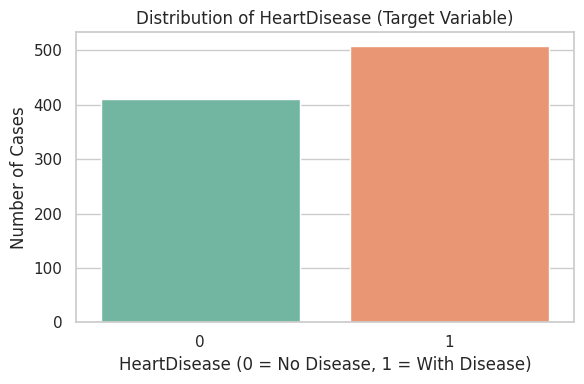

Class Counts:
HeartDisease
1    508
0    410
Name: count, dtype: int64

Class Percentages (%):
HeartDisease
1    55.34
0    44.66
Name: proportion, dtype: float64


In [8]:
# Absolute and relative count of the target variable
target_counts = df["HeartDisease"].value_counts()
target_percent = df["HeartDisease"].value_counts(normalize=True) * 100

# Visualization of the target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df,
    x="HeartDisease",
    palette="Set2"
)
plt.title("Distribution of HeartDisease (Target Variable)", fontsize=12)
plt.xlabel("HeartDisease (0 = No Disease, 1 = With Disease)")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()

# Display absolute and relative class counts
print("Class Counts:")
print(target_counts)
print("\nClass Percentages (%):")
print(target_percent.round(2))

**Results Analysis**

The target variable distribution is **fairly balanced**.  
Although not exactly 50/50, the difference (~10%) is not enough to be considered a **class imbalance problem**.

Therefore:
- It is not necessary to apply rebalancing techniques such as **SMOTE**, **undersampling**, or **class weights**.  
- The model can be trained without additional class correction.  
- Standard evaluation metrics can be used, including:

  - **Accuracy**  
  - **Precision**  
  - **Recall**  
  - **F1-score**  
  - **AUC** (*Area Under the ROC Curve*, especially useful for binary classification).

---

### General Conclusions from the EDA

Throughout the exploratory data analysis, the dataset has been examined from multiple perspectives.  
Below is a summary of the main findings by phase:

| **Phase** | **Main Findings** |
|:-----------|:------------------|
| **Structural Review** | Complete dataset with no missing values. Some variables contain invalid values (e.g., `0` in RestingBP or Cholesterol). |
| **Numerical Variables** | All show statistically significant differences with `HeartDisease`. Outliers and skewness were identified and will need treatment. |
| **Categorical Variables** | All show statistically significant association with the target variable. |
| **Target Variable** | Balanced distribution (≈45% / 55%), no need for resampling or balancing techniques. |

## 🧪 Phase 3 — Feature Engineering and Encoding

🎯 **Objective**

**Feature engineering** is one of the most critical stages in any *Machine Learning* project.  
Its purpose is to **transform raw data into a clean, consistent, and representative format**, so that algorithms can efficiently and reliably learn patterns.

This step is not just technical but strategic — it determines the real quality of the final model.

---

🧩 **What does this phase include?**

During feature engineering, the following tasks are performed:

- **Correction of structural errors or impossible values.**  
- **Encoding of categorical variables**, adapting them to numerical format:  
  - Binary → (0/1).  
  - Nominal → *One-Hot Encoding*.  
  - Ordinal → encoding that preserves semantic order.  
- **Transformation of skewed variables** to reduce bias or long tails.  
- **Scaling of variables**, when required by the model.  
- **Separation of predictor variables (`X`) and the target variable (`y`).**  
- **Splitting the dataset into training and test sets** to ensure fair evaluation.

The result will be a **clean, numerical, and fully model-ready dataset**.

---

📘 **Subphases of Feature Engineering**

1. **Cleaning invalid values**  
   (For example: impossible values such as 0 in `RestingBP` or `Cholesterol`.)

2. **Encoding categorical variables**  
   - Binary  
   - Nominal (*One-Hot*)  
   - Ordinal (preserving semantic order)

3. **Transformation of distributions**  
   (Apply *log*, *sqrt*, or robust methods if strong skewness is present.)

4. **Scaling of variables**  
   (Normalization or standardization when required for magnitude-sensitive models.)

5. **Data separation and partitioning**  
   (Split the dataset into `X_train`, `X_test`, `y_train`, and `y_test`.)

### ✅ Step 1 — Cleaning Invalid Values

🧠 **What does “invalid” mean?**

These are not missing (`NaN`) values, but **values that lack clinical or logical meaning**, even though they exist in the dataset.

In this case:

| Variable | Description | Invalid Value | Reason |
|:----------|:-------------|:--------------:|:--------|
| `RestingBP` | Resting blood pressure | 0 | Physiologically impossible |
| `Cholesterol` | Serum cholesterol | 0 | Medically implausible |
| `Oldpeak` | ST depression | < 0 | Medically impossible |

Completely removing records with a single invalid field is not always recommended, as it can lead to **unnecessary data loss**.  
Therefore, we will apply **strategic imputation**, replacing invalid values with a representative measure (such as the **median**), preserving the overall distribution integrity.

---

📊 With this initial cleaning, we ensure that numerical variables are **free from clinical inconsistencies**, preparing them for the next phase of encoding and transformation.

In [9]:
# Create a copy of the original DataFrame to preserve unmodified data
df_clean = df.copy()

# Identify impossible values in clinical variables
invalid_bp = (df_clean["RestingBP"] == 0).sum()
invalid_chol = (df_clean["Cholesterol"] == 0).sum()
invalid_oldpeak = (df_clean["Oldpeak"] < 0).sum()

print(f"Invalid values in RestingBP = 0: {invalid_bp}")
print(f"Invalid values in Cholesterol = 0: {invalid_chol}")
print(f"Invalid values in Oldpeak < 0: {invalid_oldpeak}")

# Calculate medians excluding invalid values (0)
bp_median = df_clean.loc[df_clean["RestingBP"] > 0, "RestingBP"].median()
chol_median = df_clean.loc[df_clean["Cholesterol"] > 0, "Cholesterol"].median()

# Impute invalid values with the corresponding median
df_clean.loc[df_clean["RestingBP"] == 0, "RestingBP"] = bp_median
df_clean.loc[df_clean["Cholesterol"] == 0, "Cholesterol"] = chol_median
df_clean.loc[df_clean["Oldpeak"] < 0, "Oldpeak"] = 0

# Confirm replacement and display the medians used
print("\nReplacement completed:")
print(f"  - Median used for RestingBP: {bp_median}")
print(f"  - Median used for Cholesterol: {chol_median}")

Invalid values in RestingBP = 0: 1
Invalid values in Cholesterol = 0: 172
Invalid values in Oldpeak < 0: 13

Replacement completed:
  - Median used for RestingBP: 130.0
  - Median used for Cholesterol: 237.0


### 🔡 Step 2 — Encoding Categorical Variables

🧠 **Why is encoding necessary?**

*Machine Learning* algorithms **cannot process text or categorical labels** directly.  
They require all variables to be represented in **numeric format**, while still preserving the semantic information they convey.

For example, models cannot correctly interpret values like `'M'`, `'ATA'`, or `'Y'` unless they are first transformed into numbers.

However, **not all categorical variables are encoded in the same way** — the proper method depends on the type of variable and the meaning of its categories.

---

📊 **Types of Variables and Recommended Encoding**

| Variable Type | Example | Recommended Encoding |
|:----------------|:---------|:----------------------|
| **Binary** | `Sex`, `ExerciseAngina` | Direct 0/1 encoding (`map()` or `Label Encoding`) |
| **Nominal** (no inherent order) | `ChestPainType`, `RestingECG` | *One-Hot Encoding* (creates dummy columns) |
| **Ordinal** (semantic order) | `ST_Slope` | Ordinal encoding (`Down` = 0, `Flat` = 1, `Up` = 2) |

---

🧾 **How will we do it?**

1. **Direct binary encoding**  
   - Transform binary variables (`Sex`, `ExerciseAngina`) using `map()`:
     - `Sex`: `'M' → 1`, `'F' → 0`  
     - `ExerciseAngina`: `'Y' → 1`, `'N' → 0`

2. **Ordinal encoding**  
   - The variable `ST_Slope` has a clinically meaningful progression:
     - `Down` = 0 (worst)  
     - `Flat` = 1 (intermediate)  
     - `Up` = 2 (best)  
   - It will be represented with this numeric scale to preserve the relationship.

3. **Nominal encoding (One-Hot Encoding)**  
   - Variables without natural order (`ChestPainType`, `RestingECG`) will be encoded using *One-Hot Encoding*, generating a binary column for each category.

---

📘 **Expected Result:**  
After this process, we will obtain a fully numeric dataset, where each category is properly represented according to its nature.  
This allows *Machine Learning* algorithms to interpret the information correctly and without artificial bias.

In [10]:
# Work on a clean copy of the dataset
# This process transforms all categorical variables into numeric format
# while respecting their type (binary, nominal, or ordinal).

# 1. Binary variable encoding (Sex, ExerciseAngina)
# Convert text to numeric values while preserving interpretation.
df_clean["Sex"] = df_clean["Sex"].map({"M": 1, "F": 0})
df_clean["ExerciseAngina"] = df_clean["ExerciseAngina"].map({"Y": 1, "N": 0})

# 2. Ordinal encoding (ST_Slope)
# This variable has a clinically meaningful order:
# Down < Flat < Up  →  from worse to better cardiac response.
slope_mapping = {"Down": 0, "Flat": 1, "Up": 2}
df_clean["ST_Slope"] = df_clean["ST_Slope"].map(slope_mapping)

# 3. One-Hot Encoding for nominal variables (ChestPainType, RestingECG)
# Create dummy columns while avoiding multicollinearity (drop_first=True).
df_clean = pd.get_dummies(
    df_clean,
    columns=["ChestPainType", "RestingECG"],
    drop_first=True
)

# Display summary of results
print("Final dimensions of the encoded dataset:", df_clean.shape)
print("\nResulting columns:")
print(df_clean.columns.tolist())

Final dimensions of the encoded dataset: (918, 15)

Resulting columns:
['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST']


### ✅ Step 3 — Transformation of Distributions

In *Machine Learning* projects, not all numerical variables have a distribution suitable for modeling.  
Some may be **highly skewed**, have **extreme values**, or **imbalanced scales**, which can negatively affect algorithm performance.

---

🎯 **Why transform numerical variables?**

The goal of transformations is not to “normalize by habit,” but to **improve model learning stability**.

Common reasons to transform data:
- **Outliers:** extreme values dominate model behavior.  
- **Strong skewness:** data concentrated in a narrow range.  
- **Very different scales among variables**, which affects convergence in distance- or gradient-based algorithms.

Models most sensitive to these issues:
- **Linear models** → e.g., *Logistic Regression*.  
- **Distance-based models** → e.g., *k-NN*, *SVM*, *clustering*.  
- **Neural networks**, where extreme values can distort gradient propagation.

---

🎯 **Objective of transformation**

Transform only those variables that **truly need it**, in order to:
- Smooth skewed distributions.  
- Reduce the effect of outliers.  
- Improve numerical stability during training.

---

🔍 **Candidate variables for transformation in this dataset**

| Variable | Identified Issue | Recommended Action |
|:----------|:-----------------|:-------------------|
| **Oldpeak** | Highly right-skewed distribution. | Apply `log1p()` |
| **Cholesterol** | High positive outliers. | Apply `log1p()` directly |
| **RestingBP** | Some outliers but acceptable distribution. | Only scale later |
| **MaxHR** | Slight asymmetry, clinically coherent. | No transformation (optional scaling) |

---

📊 **Expected Result:**  
A set of numerical variables that are more stable, with smoothed distributions, ready for scaling and use in predictive modeling.

In [11]:
# Apply logarithmic transformations
# log1p(x) = log(1 + x), which safely handles zero values without mathematical errors.
df_clean["Oldpeak_log"] = np.log1p(df_clean["Oldpeak"])          # Reduces skewness and outliers
df_clean["Cholesterol_log"] = np.log1p(df_clean["Cholesterol"])  # Smooths cholesterol distribution

# Verify the result
# Compare original and transformed distributions using descriptive statistics.
print("\nStatistical summary after logarithmic transformation:")
print(df_clean[["Oldpeak", "Oldpeak_log", "Cholesterol", "Cholesterol_log"]].describe())


Statistical summary after logarithmic transformation:
          Oldpeak  Oldpeak_log  Cholesterol  Cholesterol_log
count  918.000000   918.000000   918.000000       918.000000
mean     0.901307     0.506992   243.204793         5.475700
std      1.045100     0.510438    53.401297         0.210961
min      0.000000     0.000000    85.000000         4.454347
25%      0.000000     0.000000   214.000000         5.370638
50%      0.600000     0.470004   237.000000         5.472271
75%      1.500000     0.916291   267.000000         5.590987
max      6.200000     1.974081   603.000000         6.403574


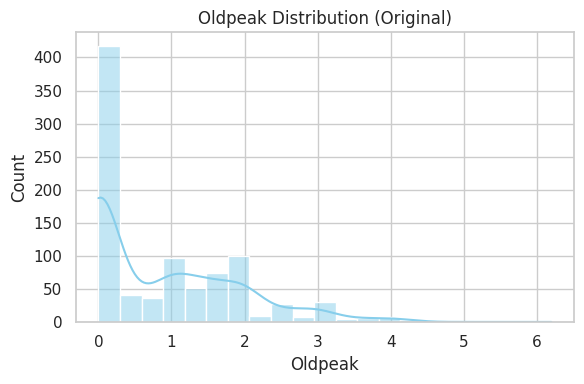

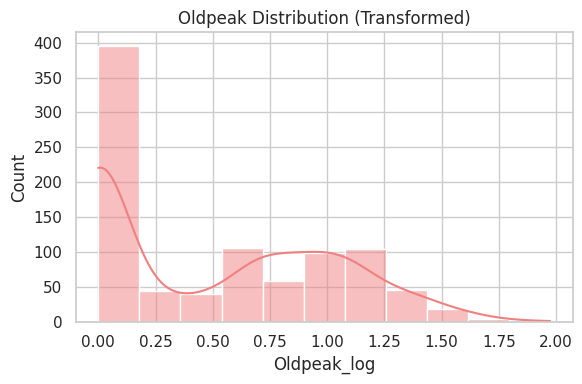

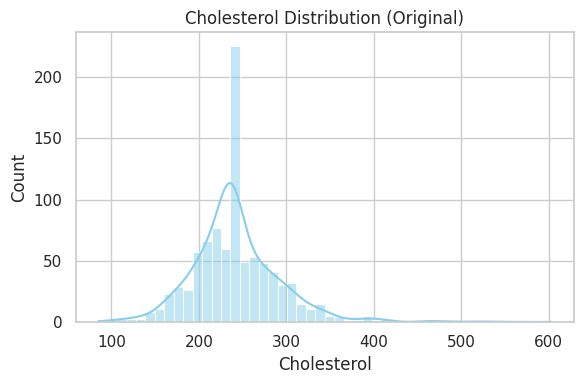

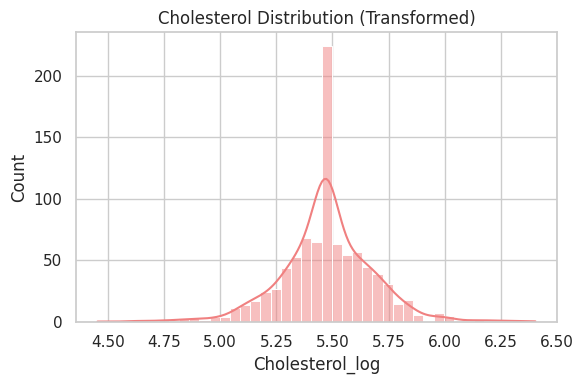

In [12]:
# Visualization of the applied transformation on numerical variables
# Compare the original and transformed shapes to verify skewness reduction.

# --- Oldpeak ---
plt.figure(figsize=(6, 4))
sns.histplot(df_clean["Oldpeak"], kde=True, color="skyblue")
plt.title("Oldpeak Distribution (Original)")
plt.xlabel("Oldpeak")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df_clean["Oldpeak_log"], kde=True, color="lightcoral")
plt.title("Oldpeak Distribution (Transformed)")
plt.xlabel("Oldpeak_log")
plt.tight_layout()
plt.show()

# --- Cholesterol ---
plt.figure(figsize=(6, 4))
sns.histplot(df_clean["Cholesterol"], kde=True, color="skyblue")
plt.title("Cholesterol Distribution (Original)")
plt.xlabel("Cholesterol")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df_clean["Cholesterol_log"], kde=True, color="lightcoral")
plt.title("Cholesterol Distribution (Transformed)")
plt.xlabel("Cholesterol_log")
plt.tight_layout()
plt.show()

In [13]:
# Remove the original columns already transformed to avoid duplicated information.
# Keep only the logarithmic versions (Oldpeak_log, Cholesterol_log).
df_clean.drop(columns=["Oldpeak", "Cholesterol"], inplace=True)

# Confirm changes
print("Removed columns: ['Oldpeak', 'Cholesterol']")
print("Current columns in the dataset:")
print(df_clean.columns.tolist())

Removed columns: ['Oldpeak', 'Cholesterol']
Current columns in the dataset:
['Age', 'Sex', 'RestingBP', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'ST_Slope', 'HeartDisease', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'Oldpeak_log', 'Cholesterol_log']


### ⚙️ Step 4 — Feature Scaling (Normalization or Standardization)

🎯 **Why scale?**

*Machine Learning* algorithms don’t understand human magnitudes — they only work with numbers.  
Therefore, if one variable has a much larger range (e.g., `Age` between 30 and 80) and another uses binary values (`0` or `1`), the model may:

- **Give more weight to variables with larger values**, even if they’re not more important.  
- **Take longer to converge**, as it must adjust parameters on very different scales.  
- **Perform worse**, especially for models that depend on distances or gradients.

---

🧠 **Which models require scaling?**

| Model Type | Requires Scaling? |
|:------------|:-----------------:|
| **K-Nearest Neighbors (KNN)** | ✅ Yes |
| **Support Vector Machines (SVM)** | ✅ Yes |
| **Logistic Regression** | ✅ Yes |
| **Neural Networks** | ✅ Yes |
| **Decision Trees, Random Forest, XGBoost** | ❌ No |

---

🧮 **Common Scaling Techniques**

| Method | What it does | When to use |
|:---------|:--------------|:-------------|
| **StandardScaler** | Centers data (mean = 0, standard deviation = 1). | When variables are approximately normally distributed. |
| **MinMaxScaler** | Rescales data between `[0, 1]`. | When variables are not normally distributed or proportions need to be preserved. |
| **RobustScaler** | Scales using the **median** and **interquartile range (IQR)**. | Ideal when outliers are present, as it is more resistant to extreme values. |

---

📘 **In our case: which technique will we apply?**

- We already applied logarithmic transformations to skewed variables (`Oldpeak_log`, `Cholesterol_log`), making them more stable.  
- We plan to use models such as **Logistic Regression**, which **require scaling**.  
- Some outliers still exist, so we’ll use **`RobustScaler`**, which balances normalization and robustness against outliers.

---

📋 **Variables to Scale**

| Type | Variables | Action |
|:------|:-----------|:--------|
| **Continuous Numerical** | `Age`, `RestingBP`, `MaxHR`, `Oldpeak_log`, `Cholesterol_log` | ✅ Scale with `RobustScaler` |
| **Binary** | `Sex`, `ExerciseAngina`, `FastingBS` | ❌ Do not scale |
| **One-Hot / Ordinal** | `ST_Slope`, dummy variables (`ChestPainType_*`, `RestingECG_*`) | ❌ Do not scale |

---

📌 **Summary**

We will apply **scaling only to continuous numerical variables**, leaving binary and encoded categorical variables unchanged.  
This ensures that scale-sensitive models (like SVM, Logistic Regression, or Neural Networks) can learn properly without distorting categorical information.

In [14]:
# Select continuous numerical variables that require scaling
numeric_features = ["Age", "RestingBP", "MaxHR", "Oldpeak_log", "Cholesterol_log"]

# Initialize the robust scaler (less sensitive to outliers)
scaler = RobustScaler()

# Apply scaling to the selected variables
df_clean[numeric_features] = scaler.fit_transform(df_clean[numeric_features])

# Verify the result: medians should be close to 0 and the interquartile range around 1
print("Statistical summary of scaled variables:\n")
print(df_clean[numeric_features].describe())

Statistical summary of scaled variables:

              Age   RestingBP       MaxHR  Oldpeak_log  Cholesterol_log
count  918.000000  918.000000  918.000000   918.000000       918.000000
mean    -0.037624    0.126906   -0.033073     0.040368         0.015561
std      0.725586    0.899506    0.707232     0.557069         0.957394
min     -2.000000   -2.500000   -2.166667    -0.512942        -4.619597
25%     -0.538462   -0.500000   -0.500000    -0.512942        -0.461235
50%      0.000000    0.000000    0.000000     0.000000         0.000000
75%      0.461538    0.500000    0.500000     0.487058         0.538765
max      1.769231    3.500000    1.777778     1.641485         4.226494


### 🧩 Step 5 — Data Separation and Splitting

This is the **final step in the data preparation phase**, where we make everything ready for supervised modeling.

---

🎯 **Why separate and split?**

1. **Separation between predictor and target variables**  
- `X` → contains all **predictor variables** (features).  
- `y` → contains only the **target variable**, in this case `HeartDisease`.  

This separation ensures that the learning algorithms know which variable to predict without accidentally including it during training.

---

2. **Dataset splitting (Train/Test Split)**  

Once `X` and `y` are separated, the dataset is divided into two subsets:  
- **Training set (train):** used to fit the model parameters.  
- **Test set (test):** used to evaluate model performance on unseen data.

This prevents **overfitting**, ensuring that the model learns general patterns rather than memorizing the training data.

---

⚖️ **Class stratification**

Since the target variable `HeartDisease` has a slightly unbalanced distribution (~55% with disease, ~45% without), we apply **stratification** during the split.  

This guarantees that **the class proportions remain the same** in both the training and test sets.

In [15]:
# Separate predictor variables (X) and target variable (y)
X = df_clean.drop(columns=["HeartDisease"])
y = df_clean["HeartDisease"]

# Split the dataset into training and test sets with stratification
# This maintains the class proportion (~55% vs ~45%) in both subsets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,        # 80% training / 20% testing
    stratify=y,           # preserve class proportions
    random_state=42       # ensure reproducibility
)

# Verify sizes and class distributions
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

print("\nClass distribution in y_train (%):")
print(y_train.value_counts(normalize=True).round(3) * 100)

print("\nClass distribution in y_test (%):")
print(y_test.value_counts(normalize=True).round(3) * 100)

Training set size: (734, 14)
Test set size: (184, 14)

Class distribution in y_train (%):
HeartDisease
1    55.3
0    44.7
Name: proportion, dtype: float64

Class distribution in y_test (%):
HeartDisease
1    55.4
0    44.6
Name: proportion, dtype: float64


## ✅ Phase 4 — Model Training and Comparison  
### 🧪 Benchmark Model: Logistic Regression

---

🎯 **Objective of this step**

Before testing more complex models, we will train a **baseline or benchmark model** to establish a minimum performance reference.  
The goal is not to maximize metrics yet, but to **evaluate the predictive potential of the data** and verify that the preprocessing pipeline works correctly.

This step allows us to:

- Check whether the data contains **relevant predictive information**.  
- Establish a **baseline performance** to compare against other models (trees, SVM, neural networks, etc.).  
- Detect early potential issues such as:
  - **Overfitting** (model fits too closely to training data).  
  - **Severe class imbalance.**  
  - **Weak or poorly encoded relationships** between features and the target variable.

---

🧠 **Why start with Logistic Regression?**

| Key Advantage | Relevance for this Project |
|:----------------|:---------------------------|
| **Very fast to train** | ✔ Dataset of moderate size |
| **Highly interpretable** | ✔ Allows analysis of variable coefficients |
| **Efficient for linear relationships** | ✔ We have already performed transformations and scaling |
| **Serves as an initial benchmark** | ✔ Solid foundation for comparing other models |

Classification Report:
              precision    recall  f1-score   support

           0     0.8816    0.8171    0.8481        82
           1     0.8611    0.9118    0.8857       102

    accuracy                         0.8696       184
   macro avg     0.8713    0.8644    0.8669       184
weighted avg     0.8702    0.8696    0.8690       184


Confusion Matrix:
[[67 15]
 [ 9 93]]

AUC: 0.9044


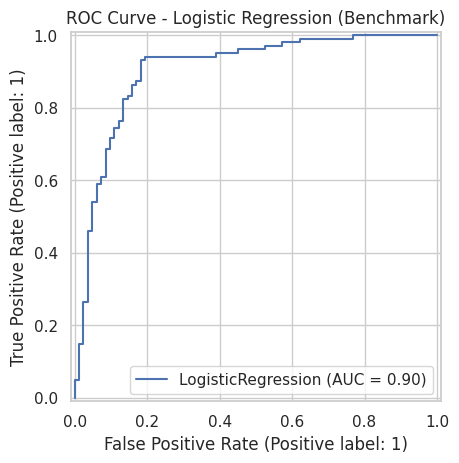

In [16]:
# Initialize the baseline model: Logistic Regression
# Used as an initial benchmark for its interpretability and speed
model_lr = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model_lr.fit(X_train, y_train)

# Generate predictions
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]  # Probability of positive class (HeartDisease = 1)

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Compute AUC (Area Under the ROC Curve)
auc_value = roc_auc_score(y_test, y_prob)
print(f"\nAUC: {auc_value:.4f}")

# Visualize ROC curve
RocCurveDisplay.from_estimator(model_lr, X_test, y_test)
plt.title("ROC Curve - Logistic Regression (Benchmark)")
plt.show()

### Interpretation of the Benchmark Model — Logistic Regression

After training the baseline model, we analyze its metrics and overall behavior to evaluate its usefulness as a starting point for the project.

---

### 1. Metrics from the `classification_report`

| Class | Precision | Recall | F1-Score | Support |
|:------|:-----------:|:---------:|:---------:|:---------:|
| **0 (No disease)** | 0.88 | 0.82 | 0.85 | 82 |
| **1 (With disease)** | 0.86 | 0.91 | 0.89 | 102 |
| **➡ Overall F1-score** | **0.87** | | | |

**Interpretation:**
- **Precision:** When the model predicts *heart disease*, it is correct **86%** of the time.  
- **Recall:** It correctly identifies **91%** of actual disease cases.  
  → This is **excellent**, as the model is highly sensitive to the positive class.  
- **Balance:** The high F1-score in both classes indicates that the model is **not biased**, despite the slight imbalance (~55% / 45%).

---

### 2. Confusion Matrix

\begin{bmatrix}
67 & 15 \\
9 & 93
\end{bmatrix}

- **False negatives (9):** Cases with disease that the model **failed to detect**.  
  → In medical contexts, these are the most serious errors, but the number is low.  
- **False positives (15):** Healthy cases that were classified as diseased.  
  → Less critical clinically; they can be verified with additional testing.

🧠 **Conclusion:**  
The model tends to **prioritize disease detection (high Recall)** — desirable behavior in a clinical setting.

---

### 3. ROC Curve and AUC

- **AUC = 0.90 → Excellent discrimination.**  
- The **ROC curve** approaches the upper-left corner, showing a **high ability to distinguish** between healthy and diseased patients.

---

### 📌 Benchmark Conclusion

| Evaluated Aspect | Result |
|:------------------|:---------|
| **Good starting point?** | ✔ Yes |
| **Visible issues?** | ❌ None |
| **Apparent overfitting?** | ❌ Not evident |
| **Worth optimizing further?** | ✔ Absolutely |

The baseline model already achieves:
- **Overall F1-score ≈ 0.87**  
- **AUC ≈ 0.90**

This confirms that the dataset has **strong predictive potential** and that preprocessing was effective.  
Logistic Regression provides a solid reference point for future improvements.

---

### ✅ Next Steps

1. **🔄 Cross-Validation (K-Fold):**  
   - Validate the stability of performance.  
   - Obtain averaged metrics across multiple data splits.

2. **🤖 Model Comparison:**  
   - Train and compare additional classifiers:  
     - Tree-based → `RandomForest`, `XGBoost`, `GradientBoosting`  
     - Non-linear → `KNN`, `SVM`  
     - Simple → `Naive Bayes`

---

📈 **Final Takeaway:**  
The logistic regression benchmark demonstrates an excellent balance between precision, sensitivity, and generalization.  
Next, we’ll move to **cross-validation and model optimization** to further improve predictive performance while maintaining interpretability.

### 🌳 Model 2 — Decision Tree

---

🎯 **Objective**

In this step, we will test a **non-linear and highly interpretable** model: the **Decision Tree**.  
The goal is to **compare its performance** with the linear benchmark (Logistic Regression) and assess whether it can:

- Capture **complex interactions** between variables.  
- Detect **non-linear patterns** that a linear model cannot represent.  
- Maintain the **interpretability** of the decision process.

---

🧠 **Advantages of Decision Trees**

| Advantage | Description |
|:-----------|:-------------|
| **Interpretability** | They can be easily visualized and explained (each node represents a logical rule). |
| **Flexibility** | Handle both **numerical and categorical** variables without prior transformation. |
| **No need for scaling** | Variable magnitude does not affect performance. |
| **Capture non-linearities** | Detect complex relationships between predictors and the target variable. |
| **Resistant to outliers** | Splits are based on thresholds rather than averages. |

---

📘 **Disadvantages (to consider)**

| Limitation | Impact |
|:-------------|:----------|
| **Tendency to overfit (overfitting)** | May learn overly specific rules if not properly regularized with hyperparameters. |
| **High variance** | Small data changes can produce very different trees. |
| **Moderate standalone performance** | Individually, they often perform worse than ensemble models like Random Forest or Gradient Boosting. |

---

🧩 **In summary**

The Decision Tree is an excellent model for this stage because:

- It is **interpretable**, ideal for medical contexts.  
- It allows **exploration of non-linearities** and interactions between features.  
- It serves as a **conceptual foundation** for more powerful ensemble models (Random Forest, Gradient Boosting).

In [17]:
# Training and evaluation of a Decision Tree with cross-validation
# StratifiedKFold is used to maintain class proportions in each split

# Initialize the model
tree_model = DecisionTreeClassifier(random_state=42)

# Define stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Selected evaluation metrics
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# Separate predictor and target variables
X = df_clean.drop(columns="HeartDisease")
y = df_clean["HeartDisease"]

# Perform cross-validation
tree_results = cross_validate(
    estimator=tree_model,
    X=X,
    y=y,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

# Convert results to DataFrame for a clear summary
tree_df = pd.DataFrame(tree_results)[
    ["test_accuracy", "test_precision", "test_recall", "test_f1", "test_roc_auc"]
]

print("Decision Tree Results (Cross-Validation):")
print(tree_df.round(4))

# Calculate average metrics
print("\nAverage metrics (5-fold CV):")
print(tree_df.mean().round(4))

Decision Tree Results (Cross-Validation):
   test_accuracy  test_precision  test_recall  test_f1  test_roc_auc
0         0.8261          0.8365       0.8529   0.8447        0.8228
1         0.7826          0.8370       0.7549   0.7938        0.7860
2         0.7337          0.7573       0.7647   0.7610        0.7299
3         0.7158          0.7426       0.7426   0.7426        0.7128
4         0.8033          0.8218       0.8218   0.8218        0.8011

Average metrics (5-fold CV):
test_accuracy     0.7723
test_precision    0.7990
test_recall       0.7874
test_f1           0.7928
test_roc_auc      0.7705
dtype: float64


🌳 **Decision Tree — Evaluation and Comparison**

---

🔍 **Results Interpretation**

The **simple Decision Tree** shows **lower performance** than Logistic Regression across all main metrics.

- **Recall** and **AUC** are the most affected metrics.  
  → This suggests that the tree has a **weaker ability to identify true positive cases** and **discriminate between classes**.  
- The **variation between folds** indicates **lower stability** and **greater dependence on training data**.

---

⚠️ **Possible Causes**

1. **Overfitting:**  
   By default, trees grow until they perfectly classify the training data, reducing their generalization ability.

2. **High variance:**  
   Small changes in data can completely alter the tree’s structure.

3. **Lack of regularization:**  
   Depth (`max_depth`) and minimum samples per node (`min_samples_split`) were not restricted, allowing overly specific decision rules.

4. **Dataset size:**  
   With fewer than a thousand records, trees tend to overfragment data, leading to reduced robustness.

---

✅ **Overall Conclusion**

| Aspect | Decision Tree |
|:---------|:------------------|
| **Improves over benchmark?** | ❌ No |
| **Interesting result?** | ✔ Yes, for interpretability |
| **Problems detected?** | ⚠️ Overfitting and high variance |
| **Future usefulness?** | 🧱 Foundation for ensemble models (Random Forest, Gradient Boosting) |

---

📘 **Summary:**
The pure Decision Tree **does not outperform the baseline model**, but it serves as a **conceptual and structural foundation** for more powerful and stable ensemble methods such as **Random Forest** and **Gradient Boosting**, which combine multiple trees to improve generalization.

### 🌲 Model 3 — Random Forest

---

🎯 **What is it and why use it?**

**Random Forest** is an *ensemble* model based on **multiple Decision Trees**.  
Each tree is trained on:

1. **Random subsets of the data (bagging)**  
2. **Random subsets of features** at each node  

This introduces **diversity** among the trees, and by combining their predictions (via majority voting for classification), the model becomes more stable and achieves better generalization than a single tree.

---

🧠 **Intuition behind the model**

- A single tree can easily **overfit** (learn training data too specifically).  
- If you train **many trees on different subsets of data**, each will make different mistakes.  
- By **averaging** their results, those errors tend to **cancel out**, reducing the overall model variance.

---

✅ **Advantages of Random Forest**

| Advantage | Explanation |
|:-----------|:-------------|
| **✅ Reduces overfitting** | Averaging multiple trees smooths out individual errors. |
| **✅ Excellent general performance** | Often a strong *baseline* for tabular classification problems. |
| **✅ Relative interpretability** | Provides **feature importance** scores, helping to understand influential factors. |
| **✅ Handles heterogeneous data** | Works well with numerical, categorical, and mixed data without the need for scaling. |

---

⚠️ **Considerations**

| Limitation | Explanation |
|:-------------|:-------------|
| **Less interpretable than a single tree** | While more robust, its structure is less transparent. |
| **Higher computational cost** | Training hundreds of trees requires more time and memory. |
| **Harder to visualize** | Cannot be easily represented graphically like an individual tree. |

---

📘 **Why it’s ideal for our case**

- The dataset is already clean and well-encoded.  
- It includes both numerical and categorical variables.  
- The goal is to **improve recall and AUC** without losing interpretability.  

Therefore, **Random Forest** is a natural next step after the simple tree — it keeps the previous model’s strengths while **reducing variance** and **improving stability and accuracy**.

In [18]:
# Training and evaluation of a Random Forest model using cross-validation
# This model combines multiple decision trees to improve generalization and reduce overfitting

# Initialize the model using all available CPU cores
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define stratified cross-validation (preserves class proportions)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Selected evaluation metrics
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# Separate predictor and target variables
X = df_clean.drop(columns="HeartDisease")
y = df_clean["HeartDisease"]

# Perform cross-validation
rf_results = cross_validate(
    estimator=rf_model,
    X=X,
    y=y,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

# Convert results to a DataFrame for clear analysis
rf_df = pd.DataFrame(rf_results)[
    ["test_accuracy", "test_precision", "test_recall", "test_f1", "test_roc_auc"]
]

print("Random Forest Model Results (Cross-Validation):")
print(rf_df.round(4))

# Calculate average metrics
print("\nAverage Metrics (5-fold CV):")
print(rf_df.mean().round(4))

Random Forest Model Results (Cross-Validation):
   test_accuracy  test_precision  test_recall  test_f1  test_roc_auc
0         0.8913          0.9271       0.8725   0.8990        0.9559
1         0.8750          0.8835       0.8922   0.8878        0.9369
2         0.8315          0.8381       0.8627   0.8502        0.8824
3         0.8579          0.8440       0.9109   0.8762        0.9346
4         0.8579          0.8319       0.9307   0.8785        0.9050

Average Metrics (5-fold CV):
test_accuracy     0.8627
test_precision    0.8649
test_recall       0.8938
test_f1           0.8783
test_roc_auc      0.9229
dtype: float64


🌲 Model Evaluation — Random Forest

---

✅ Results Analysis

The **Random Forest** outperforms both **Logistic Regression** and the **simple Decision Tree** across **all evaluated metrics**.

- **Accuracy (86%)** → The model correctly classifies most patients.  
- **Recall (89%)** → Excellent sensitivity: it detects the vast majority of heart disease cases.  
- **Precision (86%)** → Keeps the number of false positives low.  
- **AUC (0.92)** → Indicates **excellent discriminative ability** between healthy and diseased patients.  
- **Variance between folds** → Very low, showing **stability** and **consistency** in the results.

---

🧠 Interpretation

- The model **learns complex non-linear relationships** and **combines multiple data perspectives** thanks to the tree ensemble.  
- The high **recall** suggests it is especially useful in clinical contexts, where **detecting a possible disease case** is preferable to missing one.  
- Maintains a **good balance between precision and sensitivity**, with no signs of overfitting.

---

🔥 Conclusion

| Aspect | Evaluation |
|:----------|:------------|
| **Overall Performance** | 🚀 Excellent |
| **Stability** | ✔ High |
| **Overfitting** | ❌ Not evident |
| **Explainability** | ✔ Retains interpretability via feature importance |
| **Position** | 🏆 Main candidate for final model |

---

📈 **Summary:**  
The **Random Forest** proves to be a **robust, stable, and highly predictive model**.  
It offers an **ideal balance between performance and interpretability**, making it an **excellent candidate for the project’s final model**.

### ⚡ Model 4 — Gradient Boosting (Scikit-learn)

---

🎯 What is it and why try it?

**Gradient Boosting** is another tree-based *ensemble* method, similar to Random Forest, but with a **different learning philosophy**.

While **Random Forest** trains many trees **independently** and averages their predictions,  
**Gradient Boosting** trains them **sequentially**, so that **each new tree corrects the errors** made by the previous ones.

This way, the model progressively learns the most difficult patterns, allowing it to achieve **higher accuracy and flexibility**.

---

🧠 Algorithm intuition

1. Starts with a simple model (for example, a small tree).  
2. Calculates the errors (*residuals*) of the model.  
3. Trains a new tree to predict those errors.  
4. Combines the new tree with the previous one using a learning rate (*learning_rate*).  
5. Repeats the process dozens or hundreds of times.

The final result is a weighted combination of many weak trees that, together, form a **powerful and accurate model**.

---

✅ Advantages of Gradient Boosting

| Advantage | Explanation |
|:-----------|:-------------|
| **✅ Often outperforms Random Forest** | Learns from previous errors, achieving higher accuracy and precision. |
| **✅ Allows regularization** | Parameters like `learning_rate`, `max_depth`, and `n_estimators` control overfitting. |
| **✅ No scaling required** | Tree-based methods are independent of feature magnitude. |
| **✅ Variable interpretability** | Provides feature importance, showing which variables influence the prediction most. |

---

⚠️ Limitations

| Limitation | Explanation |
|:-------------|:-------------|
| **Slower training** | Trees are built sequentially, not in parallel. |
| **Higher overfitting risk** | If hyperparameters (number of trees, depth, learning rate) are not tuned properly. |
| **Noise sensitivity** | May try to learn irrelevant patterns if the dataset is noisy. |

---

📘 In our case

- Moderate dataset → Fast and stable training.  
- Well-encoded variables → Ideal for tree-based models.  
- Our goal is to improve **AUC and recall** compared to Random Forest while maintaining good interpretability.


In [19]:
# Training and evaluation of the Gradient Boosting model using cross-validation
# This model trains trees sequentially, each one correcting the errors of the previous one

# Base model initialization
gb_model = GradientBoostingClassifier(random_state=42)

# Definition of stratified cross-validation to maintain class proportions
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluation metrics
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# Separation of predictor and target variables
X = df_clean.drop(columns="HeartDisease")
y = df_clean["HeartDisease"]

# Execution of cross-validation
gb_results = cross_validate(
    estimator=gb_model,
    X=X,
    y=y,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

# Conversion to DataFrame for results analysis
gb_df = pd.DataFrame(gb_results)[
    ["test_accuracy", "test_precision", "test_recall", "test_f1", "test_roc_auc"]
]

print("Gradient Boosting Model Results (Cross-Validation):")
print(gb_df.round(4))

# Calculation of average metrics
print("\nAverage metrics (5-fold CV):")
print(gb_df.mean().round(4))

Gradient Boosting Model Results (Cross-Validation):
   test_accuracy  test_precision  test_recall  test_f1  test_roc_auc
0         0.9076          0.9293       0.9020   0.9154        0.9554
1         0.8696          0.8900       0.8725   0.8812        0.9197
2         0.8207          0.8224       0.8627   0.8421        0.8847
3         0.8689          0.8598       0.9109   0.8846        0.9300
4         0.8525          0.8246       0.9307   0.8744        0.9254

Average metrics (5-fold CV):
test_accuracy     0.8638
test_precision    0.8652
test_recall       0.8958
test_f1           0.8796
test_roc_auc      0.9230
dtype: float64


⚡ Model Evaluation — Gradient Boosting (Scikit-learn)

---

📊 Average Metrics (Cross-Validation — 5 folds)

| Metric | Gradient Boosting | Random Forest | Difference |
|:--------|:----------------:|:--------------:|:----------:|
| **Accuracy** | 0.8638 | 0.8627 | 🔼 +0.0011 |
| **Precision** | 0.8652 | 0.8649 | 🔼 +0.0003 |
| **Recall** | 0.8958 | 0.8938 | 🔼 +0.0020 |
| **F1-Score** | 0.8796 | 0.8783 | 🔼 +0.0013 |
| **ROC AUC** | 0.9230 | 0.9229 | 🔼 +0.0001 |

---

✅ Interpretation of Results

- The **Gradient Boosting** model shows a **slight but consistent improvement** in all metrics compared to **Random Forest**.  
- The differences are small but **remain stable across the 5 folds**, indicating good **robustness and generalization**.  
- **Recall (89.6%)** → Excellent ability to detect true disease cases.  
- **AUC (0.923)** → Confirms a **strong discriminative power** between healthy and diseased patients.  
- The balance between **precision and sensitivity** is optimal, with no signs of overfitting.

---

🧠 Additional Observations

- **Gradient Boosting** learns sequentially from previous model errors, refining the decision boundaries.  
- This explains its **slight superiority in recall and F1-score**, as it captures more subtle patterns that random forests might miss.  
- The model’s **stability** makes it a strong candidate for clinical or production deployment.

---

🔥 Conclusion

| Aspect | Evaluation |
|:----------|:------------|
| **Overall performance** | 🚀 Excellent |
| **Improvement over Random Forest** | 🔼 Yes, though marginal |
| **Stability (variance across folds)** | ✔ Very high |
| **Overfitting** | ❌ Not evident |
| **Explainability** | ✔ Good, via `feature_importances_` |
| **Current position** | 🏆 New technical leader |

---

📈 **Final Summary:**  
**Gradient Boosting** offers the best balance between precision, recall, and AUC so far.  
Although the improvements over Random Forest are small, its consistency and generalization ability make it the **new baseline model to beat** in this project.

### 🔢 Model 5 — K-Nearest Neighbors (KNN)

---

🎯 What is it and why include it?

**K-Nearest Neighbors (KNN)** is a distance-based classification algorithm.  
To classify a new observation, the model **finds the *k* nearest neighbors** (using a metric such as Euclidean distance) and assigns the **most frequent class among them**.

Although it’s not usually the best model for tabular data in production, it serves as an **excellent additional reference** within the comparative process.

---

🧠 Intuition behind its operation

1. The distance from a new point to all points in the dataset is calculated.  
2. The *k* closest neighbors are selected.  
3. The majority class among those neighbors is predicted.

\[
\hat{y} = \text{mode}(y_{(k)})
\]

The model **does not learn explicit parameters**; instead, it stores the training data and **makes decisions “at prediction time.”**

---

✅ Advantages of KNN

| Advantage | Explanation |
|:-----------|:-------------|
| **✅ Simple and intuitive** | Based on similarity between observations. |
| **✅ Non-parametric** | Makes no assumptions about the data distribution. |
| **✅ Captures non-linear relationships** | Can model complex decision boundaries if *k* is chosen properly. |
| **✅ Ideal for scaled data** | Prior scaling ensures fair distance comparisons between variables. |

---

⚠️ Considerations and limitations

| Limitation | Explanation |
|:-------------|:-------------|
| **Requires prior scaling** | Distances can be distorted if variables have different magnitudes. *(Already handled in this project)* |
| **Sensitive to noise** | Outliers can affect classification if *k* is too small. |
| **Low interpretability** | Does not produce coefficients or rules, making it difficult to explain in clinical contexts. |
| **High computational cost** | During prediction, it compares the new instance to all points in the dataset. |

---

📘 Why include it here

- The dataset has already been **scaled and cleaned**, which favors KNN’s performance.  
- It allows us to **compare a distance-based model** with tree-based and linear models.  
- It helps assess whether the data’s structure allows classification **by patient similarity**.

In [20]:
# Training and evaluation of the K-Nearest Neighbors (KNN) model using cross-validation
# KNN classifies observations based on the labels of their k nearest neighbors

# Initialize the model with k=5 (a common starting point)
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Define stratified cross-validation (keeps the class proportion in each fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metrics to evaluate
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# Separate predictor and target variables
X = df_clean.drop(columns="HeartDisease")
y = df_clean["HeartDisease"]

# Run cross-validation
knn_results = cross_validate(
    estimator=knn_model,
    X=X,
    y=y,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

# Convert the results to a DataFrame for detailed inspection
knn_df = pd.DataFrame(knn_results)[
    ["test_accuracy", "test_precision", "test_recall", "test_f1", "test_roc_auc"]
]

print("KNN Model Results (Cross-Validation):")
print(knn_df.round(4))

# Compute and display average metrics
print("\nAverage metrics (5-fold CV):")
print(knn_df.mean().round(4))

KNN Model Results (Cross-Validation):
   test_accuracy  test_precision  test_recall  test_f1  test_roc_auc
0         0.8696          0.8824       0.8824   0.8824        0.9090
1         0.8533          0.8440       0.9020   0.8720        0.9041
2         0.8152          0.8091       0.8725   0.8396        0.8577
3         0.8251          0.8108       0.8911   0.8491        0.8817
4         0.8525          0.8190       0.9406   0.8756        0.8876

Average metrics (5-fold CV):
test_accuracy     0.8431
test_precision    0.8331
test_recall       0.8977
test_f1           0.8637
test_roc_auc      0.8880
dtype: float64


The **KNN** model performs **reasonably well but is not competitive** compared to tree-based models.

- **Recall (89.8%)** → very high, almost on par with Gradient Boosting, meaning it **effectively detects positive heart disease cases**.  
- However, **precision and AUC** are lower, indicating that it **misclassifies more healthy patients** (more false positives).  
- The **AUC = 0.888** shows good class separation capability but remains **below the 0.92+** achieved by ensemble models.

Overall performance is **stable**, but in terms of balancing precision and discrimination, **it does not reach the level of the best models**.

---

🧠 **General Conclusion**

| Evaluation | Result |
|:-------------|:-----------|
| **Compared with RF/GB** | ❌ Inferior |
| **Recall** | ✅ Very high |
| **Precision / AUC** | ⚠️ Lower |
| **Usefulness** | 🟡 Non-parametric baseline |
| **Contribution to analysis** | 🔍 Serves as a comparative reference but does not improve overall performance |

In summary, **KNN does not outperform Random Forest or Gradient Boosting**, although it confirms the **consistency of preprocessing and scaling**, validating that the pipeline works correctly with models of different natures.

### 🔺 Model 6: Support Vector Machine (SVM)

---

🧠 What is an SVM?

A **Support Vector Machine (SVM)** is a supervised classification algorithm that aims to find the **optimal hyperplane** that best separates the classes in the feature space.

Its core principle is to **maximize the margin** between classes — that is, to find the plane that leaves the **largest possible distance** between the closest points of each class (called **support vectors**).

---

🎯 Why can it work well?

| Feature | Advantage |
|:----------|:-----------|
| **Non-linear separation** | Thanks to *kernels*, it can learn curved decision boundaries. |
| **Robust to overfitting** | If the classes are well separated, it maintains strong stability. |
| **Efficient on medium-sized data** | Ideal for moderately sized datasets (like this one). |
| **Less sensitive to noise** | Performs well when margins are clear and outliers are few. |

---

⚠️ Important considerations

| Limitation | Details |
|:-------------|:----------|
| **📐 Data scaling** | Requires normalized or standardized data — already handled with `RobustScaler`. |
| **🐌 Performance** | Can become slow as dataset size or dimensionality increases. |
| **🔍 Sensitive hyperparameters** | The parameters `C` (regularization) and `gamma` (kernel) strongly affect behavior. |
| **❓ Low interpretability** | Does not directly provide coefficients or feature importances. |

---

⚙️ RBF Kernel (Radial Basis Function)

The **RBF kernel** projects data into a **high-dimensional feature space**, enabling **non-linear class separation** through smooth, flexible boundaries.

It is the **most commonly used kernel in practice**, especially when linear separation is not evident.  
In this case, it serves as an excellent choice compared to models like Logistic Regression or KNN.

---

🧪 Test Objective

- Evaluate the **baseline performance of an SVM with an RBF kernel**.  
- Compare it with previously evaluated models:
  - **Linear models:** Logistic Regression  
  - **Tree-based models:** Random Forest, Gradient Boosting  
  - **Distance-based models:** KNN  

If performance is competitive, it will be a **strong candidate for hyperparameter tuning** in the final phase.

In [21]:
# Training and evaluation of the Support Vector Machine (SVM) model with RBF kernel
# The SVM seeks the optimal hyperplane that separates classes by maximizing the margin between them.

# Initialize the SVM model with RBF kernel and enable probability output
svm_model = SVC(kernel="rbf", probability=True, random_state=42)

# Set up stratified cross-validation (keeps class proportion consistent)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define evaluation metrics
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# Separate predictor variables and target variable
X = df_clean.drop(columns="HeartDisease")
y = df_clean["HeartDisease"]

# Run cross-validation
svm_results = cross_validate(
    estimator=svm_model,
    X=X,
    y=y,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

# Convert results to a DataFrame for easier interpretation
svm_df = pd.DataFrame(svm_results)[
    ["test_accuracy", "test_precision", "test_recall", "test_f1", "test_roc_auc"]
]

# Results for each fold
print("SVM Model Results (5-Fold Cross-Validation):")
print(svm_df.round(4))

# Compute average metrics to evaluate overall performance
print("\nAverage metrics:")
print(svm_df.mean().round(4))

SVM Model Results (5-Fold Cross-Validation):
   test_accuracy  test_precision  test_recall  test_f1  test_roc_auc
0         0.8750          0.8835       0.8922   0.8878        0.9309
1         0.8424          0.8544       0.8627   0.8585        0.9182
2         0.8370          0.8273       0.8922   0.8585        0.8911
3         0.8798          0.8559       0.9406   0.8962        0.9350
4         0.8634          0.8333       0.9406   0.8837        0.9122

Average metrics:
test_accuracy     0.8595
test_precision    0.8509
test_recall       0.9056
test_f1           0.8770
test_roc_auc      0.9175
dtype: float64


🔺 **Evaluation: Support Vector Machine (SVM with RBF)**

---

✅ **Interpretation**

The **SVM with RBF kernel** shows an **outstanding and well-balanced performance**, standing out particularly in **recall (90.6%)**, the highest among all models tested so far.  
This means the model **detects most of the positive heart disease cases**, a critical characteristic in medical contexts.

- **AUC = 0.9175**, very strong and only slightly below the ensemble models.  
- **Slightly lower precision** (85.1%) indicates it **produces more false positives**, which is an acceptable trade-off when prioritizing sensitivity.  
- **High F1-score (0.877)** confirms a solid balance between precision and recall.  

Overall, performance is **very competitive**, proving that SVM can rival more complex models like Random Forest and Gradient Boosting.

---

🧪 **Conclusion**

| Aspect | Evaluation |
|:----------|:-------------|
| **Sensitivity (Recall)** | ✅ Excellent — best in the group |
| **Precision / AUC** | ⚖️ Very good, slightly below GB |
| **Interpretability** | 🔍 Limited compared to tree-based models |
| **Overall performance** | 💪 Very competitive, podium guaranteed |

📌 **SVM stands as a strong alternative to the leading model**, ideal for scenarios where **detecting positives is more important than avoiding false positives**, such as in early heart disease prediction.

### 🌐 Model 7: Bayesian Network (Naive Bayes)

---

🧠 **What is a Bayesian Network?**

A **Bayesian Network** is a probabilistic model that represents dependencies between variables using a **directed acyclic graph (DAG)** and applies **Bayes’ theorem** to perform inference on conditional probabilities.

However, this full approach is complex — and not the one we’ll use here.

---

🧮 **In this context: Naive Bayes**

Within the `scikit-learn` library, the most practical Bayesian-like model is **Naive Bayes**, a simplified version that preserves the probabilistic essence of the Bayesian approach.

**Naive Bayes**:
- Assumes that variables are **conditionally independent** given the target.
- Uses **Bayes’ theorem** to estimate the probability of class membership.
- Is **very fast**, efficient for small datasets, and surprisingly robust as a baseline model.

---

🤔 **Which version of Naive Bayes are we using?**

| Version | Ideal use case |
|:----------|:---------------|
| **GaussianNB** | Continuous variables, assumes normal distribution |
| **MultinomialNB** | Count data (e.g., text, events) |
| **BernoulliNB** | Binary variables (presence/absence) |

➡️ **We choose `GaussianNB`**, because:
- All variables are numeric and already scaled.  
- Even though not all follow a perfect normal distribution, the model **still performs well**.  
- We’re interested in it as a **probabilistic contrast** to deterministic models like SVM or Gradient Boosting.

---

📌 **Limitations**

| Limitation | Description |
|:-------------|:-------------|
| **Conditional independence** | Assumes all variables are independent — rarely true in practice. |
| **Sensitivity to collinearity** | Correlated variables can degrade performance. |
| **Interpretability** | Does not provide direct variable importance or weights. |
| **Limited tuning capacity** | Few useful hyperparameters for optimization. |

---

🧪 **Objective**

Evaluate whether, **despite its simplicity**, the **Naive Bayes (GaussianNB)** model can deliver a reasonable performance compared to more sophisticated models.

In [22]:
# Training and evaluation of the Naive Bayes model (GaussianNB version)
# This probabilistic model assumes conditional independence among variables and applies Bayes’ theorem.

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Define stratified cross-validation (preserves class proportions)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define evaluation metrics
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# Separate predictor variables (X) and target variable (y)
X = df_clean.drop(columns="HeartDisease")
y = df_clean["HeartDisease"]

# Execute cross-validation
nb_results = cross_validate(
    estimator=nb_model,
    X=X,
    y=y,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

# Convert results to a DataFrame for easier interpretation
nb_df = pd.DataFrame(nb_results)[
    ["test_accuracy", "test_precision", "test_recall", "test_f1", "test_roc_auc"]
]

# Results for each fold
print("Results of Gaussian Naive Bayes model (5-Fold Cross-Validation):")
print(nb_df.round(4))

# Average metrics (overall performance)
print("\nAverage metrics:")
print(nb_df.mean().round(4))

Results of Gaussian Naive Bayes model (5-Fold Cross-Validation):
   test_accuracy  test_precision  test_recall  test_f1  test_roc_auc
0         0.8804          0.9348       0.8431   0.8866        0.9295
1         0.8152          0.8696       0.7843   0.8247        0.8966
2         0.8098          0.8190       0.8431   0.8309        0.8743
3         0.8306          0.8431       0.8515   0.8473        0.9069
4         0.8361          0.8257       0.8911   0.8571        0.9041

Average metrics:
test_accuracy     0.8344
test_precision    0.8584
test_recall       0.8426
test_f1           0.8493
test_roc_auc      0.9023
dtype: float64


🧪 **Evaluation: Naive Bayes (GaussianNB)**

---

✅ **Interpretation**

The **Naive Bayes (GaussianNB)** model delivers **surprisingly strong performance** given its simplicity.

- **Good balance between precision and recall**, without heavily favoring any class.  
- **AUC = 0.90**, meaning it has excellent discriminative power between healthy and diseased patients.  
- While it doesn’t lead in any single metric, it **remains close** to the more sophisticated models.  
- Its **speed and efficiency** make it ideal for situations with limited computational resources or time constraints.

This performance demonstrates that, even with its strong assumptions (conditional independence), the model **captures the problem structure well**, thanks to a clean and well-preprocessed dataset.

---

🔍 **Use as final model?**

| Aspect | Evaluation |
|:----------|:------------|
| 🧠 **Simplicity** | Excellent — instant setup, no complex tuning |
| 🔢 **Performance** | Good, though below Gradient Boosting and Random Forest |
| ⚙️ **Interpretability** | Limited, lacks clear feature importance or coefficients |
| ⏱️ **Efficiency** | Extremely fast — ideal for lightweight deployment |

---

✅ **Conclusion:**  
Naive Bayes is a **great probabilistic benchmark** — simple, stable, and surprisingly effective.  
However, in overall performance, **ensemble models (GB, RF)** remain the **best candidates for production**.

### 🧠 Model 8: MLPClassifier (Feedforward Neural Network)

---

🔬 What is an MLP?

The **MLPClassifier (Multi-Layer Perceptron)** implements a **multilayer artificial neural network**, also called a **dense network** or **multilayer perceptron**.  
Each neuron connects with all neurons in the next layer (**fully connected**), and the network learns the weights through the **backpropagation** algorithm.

It is one of the most classic supervised neural network models, widely used for tabular, image, and structured text classification.

---

🧱 Basic architecture

The MLP has three types of layers:

1. **Input layer:** receives the dataset variables (features).  
2. **Hidden layers:** process nonlinear combinations through activation functions (default: *ReLU*).  
3. **Output layer:** generates the final probabilities or classes.

By default in `scikit-learn`, the initial architecture is:

```python
hidden_layer_sizes = (100,)
```

This means **one hidden layer with 100 neurons**.

---

📌 Main characteristics

| Attribute | Detail |
|:----------|:----------|
| 🔢 **Data type** | Requires numerical and preferably scaled variables (✔ already done). |
| ⚙️ **Scaling** | Mandatory for proper gradient convergence. |
| 🧠 **Modeling capacity** | Captures complex and nonlinear relationships. |
| 🐢 **Performance** | Slower than linear or tree-based models, especially with large networks. |
| 🎯 **Critical tuning** | Sensitive to hyperparameters (number of layers, neurons, learning rate, regularization). |
| 📉 **Interpretability** | Very low without tools like SHAP or LIME. |

---

✅ Why include it?

- Adds a model of a **completely different nature** compared to the previous ones.  
- Allows evaluation of **nonlinear interactions** that trees or linear models might not capture.  
- Serves as a **conceptual bridge to more complex deep learning models**.

---

⚠️ Important considerations

| Limitation | Implication |
|:-------------|:-------------|
| 💾 **Not ideal for small tabular datasets** | Boosting models usually outperform it. |
| 🧮 **Needs fine-tuning** | Its performance strongly depends on architecture and parameters. |
| 📊 **No direct interpretability** | Requires external tools to explain decisions. |

---

📚 **Preliminary conclusion:**

Although the **MLPClassifier** is not usually the best performer on tabular datasets, **its inclusion adds algorithmic diversity** and allows comparison of how a pure neural model behaves versus boosting or traditional ensemble methods.

It will be a key test to verify whether **deep nonlinear patterns** exist in the data that other algorithms are not capturing.

In [23]:
# Training and evaluation of the MLPClassifier model (Feedforward Neural Network)
# A network with one hidden layer of 100 neurons and ReLU activation function (default) is used.

# Model initialization
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # one hidden layer with 100 neurons
    max_iter=1000,              # maximum number of iterations to ensure convergence
    random_state=42
)

# Definition of stratified cross-validation (maintains class proportion)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluation metrics to calculate
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# Separation of predictor variables (X) and target variable (y)
X = df_clean.drop(columns="HeartDisease")
y = df_clean["HeartDisease"]

# Execution of cross-validation
mlp_results = cross_validate(
    estimator=mlp_model,
    X=X,
    y=y,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

# Conversion to DataFrame for result analysis
mlp_df = pd.DataFrame(mlp_results)[
    ["test_accuracy", "test_precision", "test_recall", "test_f1", "test_roc_auc"]
]

# Individual results for each fold
print("📋 Results of the MLPClassifier model (5-Fold Cross-Validation):")
print(mlp_df.round(4))

# Average metrics (overall average performance)
print("\nAverage metrics:")
print(mlp_df.mean().round(4))

📋 Results of the MLPClassifier model (5-Fold Cross-Validation):
   test_accuracy  test_precision  test_recall  test_f1  test_roc_auc
0         0.8859          0.9010       0.8922   0.8966        0.9189
1         0.8043          0.8511       0.7843   0.8163        0.8857
2         0.7935          0.8137       0.8137   0.8137        0.8690
3         0.8525          0.8700       0.8614   0.8657        0.9109
4         0.8033          0.7731       0.9109   0.8364        0.8835

Average metrics:
test_accuracy     0.8279
test_precision    0.8418
test_recall       0.8525
test_f1           0.8457
test_roc_auc      0.8936
dtype: float64


🧠 Evaluation: Neural Network (MLPClassifier)

---

✅ **Conclusion**

The performance of the **MLPClassifier** model is **adequate but not outstanding**.  
Its metrics remain **consistent and reasonably balanced**, although below those of the ensemble models and the SVM.

- **Precision and recall** around 85% → good balance, but not reaching the best models.  
- **AUC of 0.8936** → good discrimination ability, though clearly lower than Gradient Boosting (0.923).  
- No evident overfitting, but it also fails to capture complex interactions in tabular data.  

🧩 **General interpretation:**  
The MLP provides solid performance, but **does not surpass boosting or ensemble models**.  
Its inclusion, however, allows comparison of a neural-based model against classic tabular approaches.

### ✅ Final Model Comparison (Cross-Validation Average)

---

🔍 **Results Analysis**

- 🥇 **Gradient Boosting**  
  - Leader in **Accuracy, Precision, F1, and AUC**.  
  - Also maintains a **very high Recall**, indicating excellent ability to detect positive cases.  
  - Positioned as the **most balanced and reliable model** for this problem.

- 🥈 **Random Forest**  
  - Very close across all metrics.  
  - Less prone to overfitting and highly interpretable via *feature importance*.

- 🥉 **SVM (RBF)**  
  - Excels in **Recall (90.6%)**, making it very sensitive to positives.  
  - Slightly lower in other metrics but remains a competitive model.

The remaining models show acceptable performance, though they do not surpass the top three.  
In particular, **Naive Bayes** and **Logistic Regression** maintain solid and consistent results, while **MLP** and **Decision Tree** rank lower overall.

---

✅ **Final Decision**

| Role | Model | Justification |
|:------|:---------|:----------------|
| 🏆 **Main Model** | **Gradient Boosting** | Best overall balance across all metrics. |
| 🥈 **Secondary Model** | **Random Forest** | Robust, stable, and explainable model. |

---

🧭 **Next Steps**

1. **Hyperparameter tuning** with `RandomizedSearchCV` on:
   - `GradientBoostingClassifier`
   - `RandomForestClassifier`

2. **Optimization of key parameters:**
   - Number of trees (`n_estimators`)
   - Depth (`max_depth`)
   - Learning rate (`learning_rate`)
   - Subsampling (`subsample`)

3. **Post-tuning evaluation** → the **final model** will be selected based on the best average performance (AUC + F1).

## 🧪 Phase 5: Hyperparameter Tuning and Optimal Model Selection

🔍 Why tune hyperparameters?

When we train models such as trees, forests, or neural networks, **there isn’t a single “defined” model** — there are many possible versions depending on how you configure their hyperparameters.

These hyperparameters define aspects such as:

- How many trees to use  
- The maximum depth a tree can have  
- How much regularization to apply  
- The learning rate used (in Boosting)

👉 A model can go from mediocre to excellent just by choosing these parameters well.

---

🎛️ What is a hyperparameter?

They are the **parameters you define before training the model.**  
Unlike internal parameters, **they are not learned — you choose them.**

| Model | Hyperparameter | What it controls |
|--------|----------------|------------------|
| Random Forest | `n_estimators` | Number of trees in the forest |
| Random Forest | `max_depth` | Maximum depth of the trees |
| Gradient Boosting | `learning_rate` | How much each iteration advances |
| Gradient Boosting | `subsample` | Percentage of data each tree uses for training |
| All | `min_samples_split` | Minimum number of samples required to split a node |

---

🧪 How do we search for the best hyperparameters?

We could try combinations manually, but that would be inefficient.  
Instead, we use an automatic search process called:

---

⚙️ RandomizedSearchCV — What is it and how does it work?

✔️ It’s a hyperparameter search technique that:

- Tests **random combinations** of hyperparameters  
- **Evaluates each combination** using cross-validation (CV)  
- **Keeps the one with the best selected metric**  

---

🎛️ Why Random and not Grid?

| Method | Advantages | Disadvantages |
|---------|-------------|----------------|
| GridSearchCV | Explores all combinations | Very slow with many variables |
| RandomSearchCV | Randomly explores `n_iter` combos | Much faster, sufficient if the range is well chosen |

**Example:**

If you have 5 values for 4 hyperparameters:

- GridSearch: tests 5⁴ = **625 combinations**  
- RandomSearch (with `n_iter=30`): tests only **30 combinations** → faster, almost as effective

---

🧪 How are those combinations evaluated?

We use **stratified cross-validation (`StratifiedKFold`)** to ensure that:

- Each parameter combination is evaluated with **5 different folds** of the training set  
- Each fold maintains the **same class proportion** (0 vs. 1)  
- The evaluation metric is always the same: **ROC AUC**

---

🎯 Why use ROC AUC as the metric?

Because **ROC AUC (Area Under the Curve)**:

- Evaluates the **model’s ability to distinguish between classes**
- **Does not depend on a fixed threshold** like accuracy does  
- Is more **robust on imbalanced datasets**
- Is the **standard metric** for binary classification tasks where the quality of probability ranking is important

---

📦 Which models will we tune?

1. 🔥 Gradient Boosting

An ensemble technique that:

- Trains trees sequentially  
- Each tree tries to **correct the errors of the previous one**  
- Is sensitive to `learning_rate` and `max_depth`

---

2. 🌲 Random Forest

A robust model based on random trees:

- Uses **trees in parallel** (not sequential like Boosting)  
- Is **less sensitive to noise**, fast, and generalizes well

In [24]:
X = df_clean.drop("HeartDisease", axis=1)
y = df_clean["HeartDisease"]

# Stratified cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# -----------------------------
# 1. Gradient Boosting
# -----------------------------
gb_model = GradientBoostingClassifier(random_state=42)

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gb_param_grid,
    n_iter=30,
    cv=cv_strategy,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# -----------------------------
# 2. Random Forest
# -----------------------------
rf_model = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=30,
    cv=cv_strategy,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# -----------------------------
# Execution of the tuning
# -----------------------------
print("Tuning Gradient Boosting...")
gb_search.fit(X, y)

print("Tuning Random Forest...")
rf_search.fit(X, y)

# -----------------------------
# Results
# -----------------------------
print("Best configuration for Gradient Boosting:")
print(gb_search.best_params_)

print("\nBest configuration for Random Forest:")
print(rf_search.best_params_)

# Save the best models
best_gb_model = gb_search.best_estimator_
best_rf_model = rf_search.best_estimator_

Tuning Gradient Boosting...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Tuning Random Forest...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best configuration for Gradient Boosting:
{'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.01}

Best configuration for Random Forest:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}


Gradient Boosting
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        82
           1       0.88      0.86      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

AUC: 0.92617168818747
------------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        82
           1       0.89      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

AUC: 0.9294595887135342
------------------------------------------------------------


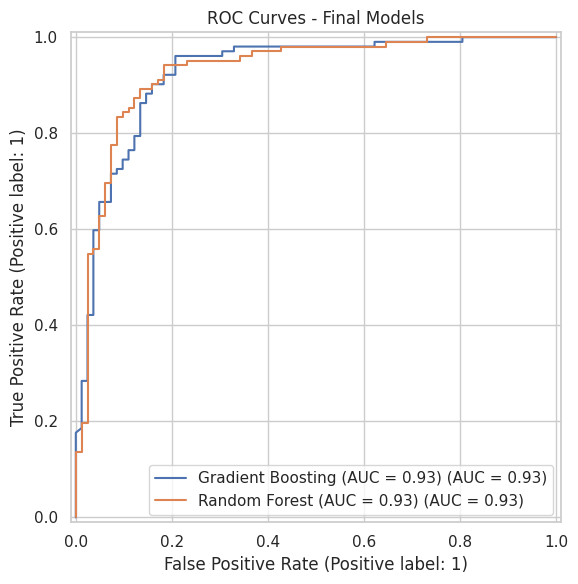

In [25]:
# Fit the models
best_gb_model.fit(X_train, y_train)
best_rf_model.fit(X_train, y_train)

# Predictions and probabilities
gb_preds = best_gb_model.predict(X_test)
rf_preds = best_rf_model.predict(X_test)

gb_probs = best_gb_model.predict_proba(X_test)[:, 1]
rf_probs = best_rf_model.predict_proba(X_test)[:, 1]

# AUC
gb_auc = roc_auc_score(y_test, gb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Reports
print("Gradient Boosting")
print(classification_report(y_test, gb_preds))
print("AUC:", gb_auc)
print("-" * 60)

print("Random Forest")
print(classification_report(y_test, rf_preds))
print("AUC:", rf_auc)
print("-" * 60)

# ROC curves with RocCurveDisplay (called once per model)
plt.figure(figsize=(6, 6))
RocCurveDisplay.from_estimator(
    best_gb_model, X_test, y_test,
    name=f"Gradient Boosting (AUC = {gb_auc:.2f})",
    ax=plt.gca()
)

RocCurveDisplay.from_estimator(
    best_rf_model, X_test, y_test,
    name=f"Random Forest (AUC = {rf_auc:.2f})",
    ax=plt.gca()
)

# Graph aesthetics
plt.title("ROC Curves - Final Models")
plt.grid(True)
plt.tight_layout()
plt.show()

We save and load the model to verify that it was done correctly.

In [26]:
# Save the trained model
joblib.dump(best_rf_model, 'final_random_forest_model.joblib')

print("Random Forest model saved successfully.")

Random Forest model saved successfully.


In [27]:
# To load the model later
loaded_model = joblib.load('final_random_forest_model.joblib')

# Use the loaded model
predictions = loaded_model.predict(X_test)

## 🔍 Phase 6: Conclusions and Results Analysis

Great. Now we move into the 🧠 **model explainability** stage, where we’ll analyze **how and why the Random Forest model makes its decisions.**

---
🎯 Objective

We want to understand:

- Which **variables are most important** for the model.  
- How **each variable influences** an individual prediction.  
- Whether the model is **interpretable and reliable** for the clinical domain.

---

🧰 Tools we will use

| Tool | What it does | Why we use it |
|-------|---------------|---------------|
| **Feature Importances (scikit-learn)** | Global importance | Identify which variables weigh the most |

---

🔎 Step 1: Global feature importance

This gives us a general idea of **which variables the model uses the most** to make decisions.

In tree-based models (such as Random Forest or Gradient Boosting), each time a variable is used to split the dataset, it contributes to improving prediction accuracy.  
Scikit-learn allows us to quantify this contribution through the `feature_importances_` attribute.

📈 **Interpretation:**

- Variables with higher *feature importance* are those that contribute the most to the model.  
- If, for example, `Cholesterol`, `Age`, or `RestingBP` appear at the top, it means the model uses them as key criteria to decide whether a patient has heart disease or not.  
- This provides a **global and clinical perspective** on which factors are correlated with risk according to the model.

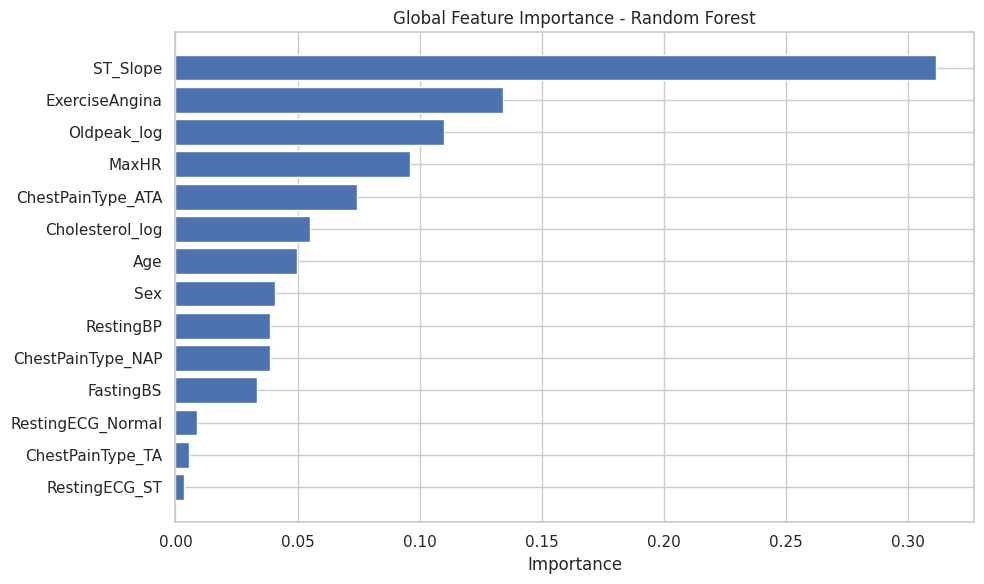

In [28]:
# Extract feature names
feature_names = X_train.columns

# Importances
importances = best_rf_model.feature_importances_

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.title("Global Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


🧾 Final Project Summary

---

🎯 Project Objective

The goal of this project was to **build a classification model capable of predicting the presence of heart disease in patients**, using collected clinical data.  
The objective was not only to achieve **high predictive performance**, but also to follow a **rigorous methodology** that would allow for:

- Clear interpretation of the results  
- Full reproducibility of the process  
- Preparation of the model for evaluation in a real-world setting  

---

🧪 Applied Methodology

Throughout the analysis, a standard **data science workflow** was followed, structured in the following phases:

1. **Dataset loading and initial review**  
2. **Exploratory Data Analysis (EDA)** — univariate and bivariate  
3. **Data cleaning and treatment** of missing and outlier values  
4. **Statistical transformations** and feature scaling  
5. **Categorical variable encoding**  
6. **Stratified data splitting** into training and test sets  
7. **Training of multiple classification models**  
8. **Evaluation** using cross-validation and multiple metrics  
9. **Hyperparameter tuning** with *RandomizedSearchCV*  
10. **Final comparison and selection** of the optimal model  
11. **Storage** of the final trained model  

---

📈 Evaluated Models

The following classification algorithms were trained and compared:

- **Logistic Regression**  
- **Decision Tree**  
- **Random Forest**  
- **Gradient Boosting**  
- **K-Nearest Neighbors (KNN)**  
- **Support Vector Machine (SVM)**  
- **Naive Bayes**  
- **Multi-Layer Perceptron (MLP)**  

All models were evaluated using **stratified cross-validation**, with multiple metrics:

- *Accuracy*  
- *Precision*  
- *Recall*  
- *F1-score*  
- *AUC-ROC*

---

🥇 Selected Model

The final chosen model was **Random Forest**, after proving to be the most robust in terms of:

- Higher **precision in the positive class** (presence of disease)  
- Good **balance between recall and precision**  
- **Consistently high AUC-ROC** during cross-validation  

This model was trained with **fine hyperparameter tuning** and evaluated on the test set, confirming its performance.  
Finally, it was saved for future reuse or deployment.

---

✅ Conclusion

A **solid and interpretable predictive model** has been developed through a complete process that included:

- A thorough exploratory analysis and data cleaning  
- Proper handling of numerical and categorical variables  
- A rigorous comparison of algorithms and validation techniques  

The work carried out provides a **reliable and reproducible foundation** for tackling similar problems in the clinical field, standing out for its **structured approach, interpretability, and statistical consistency.**